# Experiment 2

Variable Absolute Max Bytes

This for Varied transaction rates. Batch Time out 2s.
Experiment 1.1 One Trasaction per 5 second 

In [2]:
from time import sleep
def create_peer_invoke_command():
    base = "docker exec -it cli peer chaincode invoke -o orderer.organ.com:7050 --tls true --cafile /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/ordererOrganizations/organ.com/orderers/orderer.organ.com/msp/tlscacerts/tlsca.organ.com-cert.pem -C organ-channel -n organcc "
    return(base)

def add_peers(org='hl', peer_n=0):
    hl_p1_add = ' --peerAddresses peer1.histocompatibility.organ.com:7051 '
    hl_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer1.histocompatibility.organ.com/tls/ca.crt '
    hl_p0_add = ' --peerAddresses peer0.histocompatibility.organ.com:7051 '
    hl_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer0.histocompatibility.organ.com/tls/ca.crt '
    
    ho_p1_add = ' --peerAddresses peer1.hospital.organ.com:7051 '
    ho_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer1.hospital.organ.com/tls/ca.crt  '
    ho_p0_add = ' --peerAddresses peer0.hospital.organ.com:7051 '
    ho_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer0.hospital.organ.com/tls/ca.crt  '
    
    gp_p1_add = ' --peerAddresses peer1.gp.organ.com:7051 '
    gp_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer1.gp.organ.com/tls/ca.crt  '
    gp_p0_add = ' --peerAddresses peer0.gp.organ.com:7051 '
    gp_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer0.gp.organ.com/tls/ca.crt  '
    
    op_p1_add = ' --peerAddresses peer1.opo.organ.com:7051 '
    op_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer1.opo.organ.com/tls/ca.crt  '
    op_p0_add = ' --peerAddresses peer0.opo.organ.com:7051 '
    op_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer0.opo.organ.com/tls/ca.crt  '
    cmd = ""
    cmd += create_peer_invoke_command() + hl_p1_add + hl_p1_cert
    cmd += hl_p0_add + hl_p0_cert
    cmd += ho_p0_add + ho_p0_cert + ho_p1_add + ho_p1_cert
    cmd += gp_p0_add + gp_p0_cert + gp_p1_add + gp_p1_cert
    cmd += op_p0_add + op_p0_cert + op_p1_add + op_p1_cert
    return(cmd)

def add_organ(organ_id = '', organ_name='', organ_data=''):
    cmd = add_peers() + '-c '
    
    cmd += '\'{"Args":["initOrgan", "' + str(organ_id) + '", "' + str(organ_name) + '", ' + str(organ_data) + ']}\''
    return(cmd)

def read_organ(organ_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readOrgan",\"' + str(organ_id) + '\"]}\''
    return(cmd)

def add_candidate(candidate_id = '', organ_name='', info=''):
    cmd = add_peers() + '-c '
    cmd += '\'{"Args":["initCandidate", "' + candidate_id + '", "' + organ_name + '", ' + info + ']}\''
    return(cmd)

def read_candidate(candidate_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readCandidate",\"' + str(candidate_id) + '\"]}\''
    return(cmd)

def docker_cleanup():
    !{ "docker rm -f $(docker ps -aq)"}
    !{ "docker volume prune -f"}
    !{ "docker network prune -f"}
    docker_images = "docker images --format '{{.Repository}}'"
    images = !{docker_images}
    dev_images=[]
    for image in images:
        if(image.find('dev-', 0, 6)>=0):
            dev_images.append(image)
    docker_rmi = "docker rmi -f "+" ".join(dev_images)
    print(docker_rmi)
    !{docker_rmi}

In [18]:
docker_cleanup()

"docker rm" requires at least 1 argument.
See 'docker rm --help'.

Usage:  docker rm [OPTIONS] CONTAINER [CONTAINER...]

Remove one or more containers
Total reclaimed space: 0B
docker rmi -f 
"docker rmi" requires at least 1 argument.
See 'docker rmi --help'.

Usage:  docker rmi [OPTIONS] IMAGE [IMAGE...]

Remove one or more images


In [3]:
with open(r"/home/thesis/Downloads/data_1.json", 'r') as file:
    data_1 = file.read()
with open(r"/home/thesis/Downloads/data_2.json", 'r') as file:
    data_2 = file.read()
with open(r"/home/thesis/Downloads/data_3.json", 'r') as file:
    data_3 = file.read()
with open(r"/home/thesis/Downloads/data_4.json", 'r') as file:
    data_4 = file.read()
import json
data = []
data.append(json.dumps(data_1))
data.append(json.dumps(data_2))
data.append(json.dumps(data_3))
data.append(json.dumps(data_4))

Issueing Transactions every 2 seconds

In [4]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)

2019-04-25 00:16:29.642 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:16:29.643 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:16:29.643 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:16:29.643 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:16:29.643 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:16:29.643 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:16:29.643 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:16:29.643 UTC [viperutil] getKeysRec

2019-04-25 00:16:29.675 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:16:29.675 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:16:29.676 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:16:29.676 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:16:29.676 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc00044dd00, CONNECTING
2019-04-25 00:16:29.678 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00044dd00, READY
2019-04-25 00:16:29.679 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:16:29.679 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:16:29.680 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new add

2019-04-25 00:19:02.236 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:02.238 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:02.239 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:19:02.240 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:19:02.242 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:19:02.243 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:19:02.245 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:19:02.245 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:19:02.349 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0003052d0, READY
2019-04-25 00:19:02.360 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:19:02.360 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:19:02.361 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:19:02.361 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:19:02.361 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0003a3980, CONNECTING
2019-04-25 00:19:02.396 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0003a3980, READY
2019-04-25 00:19:02.404 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:19:02.405 UTC [grpc] DialContext -> DEBU

2019-04-25 00:19:03.126 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-25 00:19:03.126 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-25 00:19:03.126 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:19:03.127 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-25 00:19:03.127 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0002ae950, CONNECTING
2019-04-25 00:19:03.156 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0002ae950, READY
2019-04-25 00:19:03.185 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:19:03.186 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-25 00:19:03.187 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresse

2019-04-25 00:19:05.413 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \217&Yb\351f'6~O\314=\361z\234\343\003\204<\343\254\257\236hb\312w\276\337\301\272\014\022\220\206\001\n\351\205\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\314\205\001\n\007organcc\022\277\205\001\n\006\n\0048001\022\023\n\001\001\030\001\"\014\n\n\n\0048000\022\002\010\006\032\236\205\001\n\0048001\032\224\205\001{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \

2019-04-25 00:19:12.718 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:12.720 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:19:12.721 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:19:12.722 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Library setting to <nil> <nil>
2019-04-25 00:19:12.723 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:19:12.724 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Label setting to <nil> <nil>
2019-04-25 00:19:12.726 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:19:12.727 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2

2019-04-25 00:19:12.837 UTC [msp] newBccspMsp -> DEBU 02c Creating BCCSP-based MSP instance
2019-04-25 00:19:12.837 UTC [msp] New -> DEBU 02d Creating Cache-MSP instance
2019-04-25 00:19:12.837 UTC [msp] loadLocaMSP -> DEBU 02e Created new local MSP
2019-04-25 00:19:12.838 UTC [msp] Setup -> DEBU 02f Setting up MSP instance HospitalMSP
2019-04-25 00:19:12.841 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfKgAwIBAgIRAP2JEJ4H7Ud1k3sq/BFGQkkwCgYIKoZIzj0EAwIwdzEL
MAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNVBAcTDVNhbiBG
cmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEeMBwGA1UEAxMV
Y2EuaG9zcGl0YWwub3JnYW4uY29tMB4XDTE5MDQyNTAwMDgwMFoXDTI5MDQyMjAw
MDgwMFowdzELMAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNV
BAcTDVNhbiBGcmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEe
MBwGA1UEAxMVY2EuaG9zcGl0YWwub3JnYW4uY29tMFkwEwYHKoZIzj0CAQYIKoZI
zj0DAQcDQgAEMIZ3RA8DULOLo1dn/qH389T2QuwjjKKfIjKtQ5qv0n9KzvGs/nLz
NQMfuR3CGJY

2019-04-25 00:19:13.033 UTC [grpc] HandleSubConnStateChange -> DEBU 053 pickfirstBalancer: HandleSubConnStateChange: 0xc0003b9890, CONNECTING
2019-04-25 00:19:13.057 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0003b9890, READY
2019-04-25 00:19:13.074 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:19:13.074 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:19:13.078 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:19:13.078 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:19:13.079 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc000596270, CONNECTING
2019-04-25 00:19:13.124 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000596270, READY

2019-04-25 00:19:13.696 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:19:13.696 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:19:13.696 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:19:13.697 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:19:13.697 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0003b8dc0, CONNECTING
2019-04-25 00:19:13.720 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0003b8dc0, READY
2019-04-25 00:19:13.779 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD6070A6E08031A0C0881FA83E60510...5F4341445F444F4E223A20225962227D 
2019-04-25 00:19:13.779 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: 8C9501DFD7287ABFCF8E82937ACC1861EDA3CBAF1D85C3BD9CECE5C327FC473B 

2019-04-25 00:19:20.911 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:20.912 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:20.912 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:19:20.913 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:19:20.914 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:20.914 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:19:20.915 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:19:20.915 UTC [viperutil] getKeysRec

2019-04-25 00:19:20.959 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0003cada0, READY
2019-04-25 00:19:20.962 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:19:20.962 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-25 00:19:20.962 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:19:20.962 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-25 00:19:20.962 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc0004d30b0, CONNECTING
2019-04-25 00:19:20.967 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0004d30b0, READY
2019-04-25 00:19:20.971 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:19:20.972 UTC [grpc] DialContext -> DEBU

2019-04-25 00:19:21.091 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD5070A6D08031A0B0889FA83E60510...5F4341445F444F4E223A20226153227D 
2019-04-25 00:19:21.091 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: F4B67601DFDC6C0314DBB4DB03F49BDF9E14934523F394635EC64534F1AA71F1 
2019-04-25 00:19:21.302 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD5070A6D08031A0B0889FA83E60510...3F5C249EA2DFA251EBE2301E1755E17C 
2019-04-25 00:19:21.302 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: ED56696619C241EA616DD96C3EAEFC69B455B84F8EF3700A805E0641E4C9658C 
2019-04-25 00:19:21.307 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n `*F\214\037}:\343j\332_\023\353\030A\223\002\024\265\343:\036\031\302G5^\255\357\343i\177\022\240\206\001\n\371\205\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\334\205\001\n\007organcc\022\317\205\001\n\006\n\0

2019-04-25 00:19:26.862 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:26.863 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:26.863 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:19:26.863 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:19:26.863 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:26.864 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:19:26.864 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:19:26.864 UTC [viperutil] getKeysRec

2019-04-25 00:19:26.919 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc0002d3470, READY
2019-04-25 00:19:26.920 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:19:26.920 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:19:26.920 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:19:26.920 UTC [grpc] switchBalancer -> DEBU 05e ClientConn switching balancer to "pick_first"
2019-04-25 00:19:26.920 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc0003a8970, CONNECTING
2019-04-25 00:19:26.924 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc0003a8970, READY
2019-04-25 00:19:26.926 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:19:26.926 UTC [grpc] DialContext -> DEBU 062 schem

2019-04-25 00:19:27.161 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C088EFA83E60510...BFD2120FCE8AE41AD2A1C27E440C1A68 
2019-04-25 00:19:27.161 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 70F4614944B39E44D73F91DE5466D27168DA373551739528CF6FE6F7724F5387 
2019-04-25 00:19:27.167 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n O\350\2661gV1\361\253\317\304{\222\275\354\323\334\033\003K\005\256\273:YgJ\360A\250\302\200\022\260\206\001\n\211\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\354\205\001\n\007organcc\022\337\205\001\n\006\n\0048004\0227\n\001\001\030\001\"0\n\n\n\0048000\022\002\010\006\n\n\n\0048001\022\002\010\007\n\n\n\0048002\022\002\010\010\n\n\n\0048003\022\002\010\t\032\232\205\001\n\0048004\032\220\205\001{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candid

2019-04-25 00:19:32.779 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:32.779 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:19:32.780 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:19:32.780 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:19:32.780 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:19:32.780 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:32.780 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:19:32.781 UTC [vi

2019-04-25 00:19:32.837 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc00027abe0, READY
2019-04-25 00:19:32.838 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:19:32.838 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:19:32.838 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:19:32.838 UTC [grpc] switchBalancer -> DEBU 05e ClientConn switching balancer to "pick_first"
2019-04-25 00:19:32.839 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc0004fb650, CONNECTING
2019-04-25 00:19:32.841 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc0004fb650, READY
2019-04-25 00:19:32.842 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:19:32.842 UTC [grpc] DialContext -> DEBU 062 schem

2019-04-25 00:19:32.895 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc000415f80, READY
2019-04-25 00:19:32.898 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD6070A6E08031A0C0894FA83E60510...5F4341445F444F4E223A20224346227D 
2019-04-25 00:19:32.898 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: A0E8884A9D0F51F8FFE4BCFD3107FB0AC83926299B76D28A6B3C11179F6BF68E 
2019-04-25 00:19:33.116 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C0894FA83E60510...AB3BD351FA7AF923B875ECA47CE205D2 
2019-04-25 00:19:33.116 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 6244D97B6E3512461769A0B0AB2130CD381EC16C557AF25E5B5EE2A7A0249275 
2019-04-25 00:19:33.119 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \2401I\013(\203\330\357G'\371\r2\031\3161M\271OS\302\246\017\311V\323X\000B\301G\334\022\300\206

2019-04-25 00:19:38.686 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:38.687 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:19:38.687 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:19:38.688 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:19:38.688 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:19:38.688 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:38.688 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:19:38.689 UTC [vi

2019-04-25 00:19:38.719 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0002fa9d0, READY
2019-04-25 00:19:38.720 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:19:38.720 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-25 00:19:38.721 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:19:38.721 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-25 00:19:38.721 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc000612930, CONNECTING
2019-04-25 00:19:38.724 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc000612930, READY
2019-04-25 00:19:38.725 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:19:38.725 UTC [grpc] DialContext -> DEBU

2019-04-25 00:19:38.925 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C089AFA83E60510...81291AC6C8E7BBFAA077E6B2099901B2 
2019-04-25 00:19:38.926 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: D9D591453E582666F2DCA69CE922942B11E30DF7D3BF46A5B071DACB71EF1124 
2019-04-25 00:19:38.930 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \205\033\334\035\2502\234\202*\241|\021\315T\210\307\031\"Kt3\026x\367\235\240C\202\341\007\251\242\022\305\206\001\n\236\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\201\206\001\n\007organcc\022\364\205\001\n\006\n\0048006\022O\n\001\001\030\001\"H\n\n\n\0048000\022\002\010\006\n\n\n\0048001\022\002\010\007\n\n\n\0048002\022\002\010\010\n\n\n\0048003\022\002\010\t\n\n\n\0048004\022\002\010\n\n\n\n\0048005\022\002\010\013\032\227\205\001\n\0048006\032\215\205\001{\"docType\":\"candidate\"

2019-04-25 00:19:44.475 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:44.475 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:44.475 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:19:44.475 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:19:44.475 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:44.476 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:19:44.476 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:19:44.476 UTC [viperutil] getKeysRec

2019-04-25 00:19:44.494 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0004c7140, READY
2019-04-25 00:19:44.495 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:19:44.495 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:19:44.495 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:19:44.495 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:19:44.495 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc00031a760, CONNECTING
2019-04-25 00:19:44.499 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00031a760, READY
2019-04-25 00:19:44.500 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:19:44.500 UTC [grpc] DialContext -> DEBU

2019-04-25 00:19:44.787 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08A0FA83E60510...1AF77BD1E856C7AD6BEAA34581693745 
2019-04-25 00:19:44.788 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 5781E033AFCDFF65A588AB14CE77F72FAA8727862BDF489ED722934F29D0E79C 
2019-04-25 00:19:44.793 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \3750\265w\004K\230>1\255\225\002\001\246\225k\246\266\230\340\275\2032\267\351\370\311\2531\003\016d\022\320\206\001\n\251\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\214\206\001\n\007organcc\022\377\205\001\n\006\n\0048007\022[\n\001\001\030\001\"T\n\n\n\0048000\022\002\010\006\n\n\n\0048001\022\002\010\007\n\n\n\0048002\022\002\010\010\n\n\n\0048003\022\002\010\t\n\n\n\0048004\022\002\010\n\n\n\n\0048005\022\002\010\013\n\n\n\0048006\022\002\010\014\032\226\205\001\n\0048007\032\214\2

2019-04-25 00:19:50.336 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:50.337 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:19:50.337 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:19:50.337 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2019-04-25 00:19:50.337 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:19:50.338 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-25 00:19:50.338 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:19:50.338 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2

2019-04-25 00:19:50.361 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0002cd1e0, READY
2019-04-25 00:19:50.362 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:19:50.367 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-25 00:19:50.367 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:19:50.367 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-25 00:19:50.367 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc0003d2c60, CONNECTING
2019-04-25 00:19:50.371 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0003d2c60, READY
2019-04-25 00:19:50.372 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:19:50.373 UTC [grpc] DialContext -> DEBU

2019-04-25 00:19:50.664 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08A6FA83E60510...E21858E3E6C1EDC7CD1E9A0CF57666D5 
2019-04-25 00:19:50.664 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 3F7C0109894FF5EA8A866B3B8D98F178B8093C068A72FD73AF29EE499707F75F 
2019-04-25 00:19:50.672 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \2458\364\367\032\321\254F\216\232:Ut\337\213\331-\006\204\016\014\253\301\217N\221\234\350@o\335-\022\340\206\001\n\271\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\234\206\001\n\007organcc\022\217\206\001\n\006\n\0048008\022g\n\001\001\030\001\"`\n\n\n\0048000\022\002\010\006\n\n\n\0048001\022\002\010\007\n\n\n\0048002\022\002\010\010\n\n\n\0048003\022\002\010\t\n\n\n\0048004\022\002\010\n\n\n\n\0048005\022\002\010\013\n\n\n\0048006\022\002\010\014\n\n\n\0048007\022\002\010\r\032\232\20

2019-04-25 00:19:56.147 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:19:56.147 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:56.147 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:19:56.148 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:19:56.148 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:19:56.148 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:19:56.148 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:19:56.149 UTC [viperutil] getKeysRec

2019-04-25 00:19:56.175 UTC [grpc] HandleSubConnStateChange -> DEBU 053 pickfirstBalancer: HandleSubConnStateChange: 0xc000285dd0, CONNECTING
2019-04-25 00:19:56.177 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc000285dd0, READY
2019-04-25 00:19:56.179 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:19:56.179 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:19:56.179 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:19:56.179 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:19:56.179 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc0002d9050, CONNECTING
2019-04-25 00:19:56.182 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc0002d9050, READY

2019-04-25 00:19:56.232 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc0002d8780, READY
2019-04-25 00:19:56.233 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:19:56.233 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:19:56.233 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:19:56.234 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:19:56.234 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:19:56.234 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc000284ff0, CONNECTING
2019-04-25 00:19:56.237 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc000284ff0, READY
2019-04-25 00:19:56.240 UTC [msp.identity

2019-04-25 00:20:01.882 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:01.882 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:01.882 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:20:01.882 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:01.882 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:01.882 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:20:01.883 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:20:01.883 UTC [viperutil] getKeysRec

2019-04-25 00:20:01.905 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:20:01.905 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-25 00:20:01.905 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:01.905 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-25 00:20:01.905 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc0002e28a0, CONNECTING
2019-04-25 00:20:01.908 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0002e28a0, READY
2019-04-25 00:20:01.909 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:20:01.909 UTC [grpc] DialContext -> DEBU 050 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:01.909 UTC [grpc] watcher -> DEBU 051 ccResolverWrapper: sendi

2019-04-25 00:20:01.964 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-25 00:20:01.964 UTC [grpc] DialContext -> DEBU 08c scheme "" not registered, fallback to default scheme
2019-04-25 00:20:01.964 UTC [grpc] watcher -> DEBU 08d ccResolverWrapper: sending new addresses to cc: [{peer1.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:20:01.965 UTC [grpc] switchBalancer -> DEBU 08e ClientConn switching balancer to "pick_first"
2019-04-25 00:20:01.968 UTC [grpc] HandleSubConnStateChange -> DEBU 08f pickfirstBalancer: HandleSubConnStateChange: 0xc00039b030, CONNECTING
2019-04-25 00:20:01.975 UTC [grpc] HandleSubConnStateChange -> DEBU 090 pickfirstBalancer: HandleSubConnStateChange: 0xc00039b030, READY
2019-04-25 00:20:01.976 UTC [grpc] DialContext -> DEBU 091 parsed scheme: ""
2019-04-25 00:20:01.976 UTC [grpc] DialContext -> DEBU 092 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:01.976 UTC [grpc] watcher -> DEBU 093 ccResolverWrapper: sending new addresse

2019-04-25 00:20:07.560 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:07.560 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:07.560 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:20:07.561 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:07.561 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:20:07.561 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:20:07.561 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:20:07.561 UTC [vipe

2019-04-25 00:20:07.596 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc000611b00, READY
2019-04-25 00:20:07.598 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:20:07.598 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:07.598 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:20:07.598 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:07.598 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc0002e4c80, CONNECTING
2019-04-25 00:20:07.602 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc0002e4c80, READY
2019-04-25 00:20:07.603 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:20:07.603 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-25 00:20:07.650 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0006d80e0, CONNECTING
2019-04-25 00:20:07.654 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0006d80e0, READY
2019-04-25 00:20:07.657 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD6070A6E08031A0C08B7FA83E60510...5F4341445F444F4E223A20226153227D 
2019-04-25 00:20:07.657 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: A8443DFF99C53C491EA06FD329E444DB0D19E3C7EFB823B4B530E6BA2CEA151B 
2019-04-25 00:20:07.795 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08B7FA83E60510...F713E66C54538107988727257927D6D2 
2019-04-25 00:20:07.795 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 61372AB45B3455A9B09A8DF6FBF4B4B4910EFC160DF79DA28DDA088B44C34DB2 
2019-04-25 00:20:07.798 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\33

2019-04-25 00:20:14.301 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:14.301 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:14.302 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:20:14.302 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:20:14.302 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:20:14.303 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:14.303 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:20:14.304 UTC [vi

2019-04-25 00:20:14.386 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0001df440, READY
2019-04-25 00:20:14.391 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:20:14.391 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:20:14.391 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:14.392 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:14.392 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc00037f7c0, CONNECTING
2019-04-25 00:20:14.426 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00037f7c0, READY
2019-04-25 00:20:14.440 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:20:14.441 UTC [grpc] DialContext -> DEBU

2019-04-25 00:20:14.775 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:20:14.775 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:14.776 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc00043c670, CONNECTING
2019-04-25 00:20:14.800 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc00043c670, READY
2019-04-25 00:20:14.811 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:20:14.811 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:14.812 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:20:14.813 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:14.814 UTC [grpc]

2019-04-25 00:20:21.920 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:21.921 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:21.921 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:20:21.922 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:21.922 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:20:21.922 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:20:21.923 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:20:21.924 UTC [vipe

2019-04-25 00:20:21.999 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0001d4030, CONNECTING
2019-04-25 00:20:22.006 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0001d4030, READY
2019-04-25 00:20:22.010 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:20:22.010 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:22.010 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:22.010 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:22.010 UTC [grpc] HandleSubConnStateChange -> DEBU 047 pickfirstBalancer: HandleSubConnStateChange: 0xc0001cb470, CONNECTING
2019-04-25 00:20:22.032 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0001cb

2019-04-25 00:20:22.232 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:20:22.234 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:20:22.234 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:22.234 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:20:22.237 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:20:22.237 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc00031b6a0, CONNECTING
2019-04-25 00:20:22.245 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc00031b6a0, READY
2019-04-25 00:20:22.254 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD5070A6D08031A0B08C6FA83E60510...5F4341445F444F4E223A20224346227D 
2019-04-25 00:20:22.254 UTC [msp

2019-04-25 00:20:29.073 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:29.074 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:29.074 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:20:29.074 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:29.075 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:20:29.075 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:20:29.076 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:20:29.077 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:20:29.299 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0002a84a0, READY
2019-04-25 00:20:29.318 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:20:29.319 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:20:29.319 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:29.319 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:29.319 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000401290, CONNECTING
2019-04-25 00:20:29.466 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000401290, READY
2019-04-25 00:20:29.505 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:20:29.506 UTC [grpc] DialContext -> DEBU

2019-04-25 00:20:30.139 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc0002a9f30, READY
2019-04-25 00:20:30.152 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-25 00:20:30.153 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:30.154 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:20:30.155 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:30.159 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0003decd0, CONNECTING
2019-04-25 00:20:30.175 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0003decd0, READY
2019-04-25 00:20:30.182 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:20:30.182 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-25 00:20:31.728 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-25 00:20:38.478 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:38.495 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:38.495 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:20:38.497 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:38.498 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:38.498 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash set

2019-04-25 00:20:38.606 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc00022ca00, READY
2019-04-25 00:20:38.619 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:20:38.621 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:20:38.622 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:38.642 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:38.644 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000545b20, CONNECTING
2019-04-25 00:20:38.671 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000545b20, READY
2019-04-25 00:20:38.675 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:20:38.675 UTC [grpc] DialContext -> DEBU

2019-04-25 00:20:38.963 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc0005512c0, READY
2019-04-25 00:20:38.969 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-25 00:20:38.973 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:38.973 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:20:38.974 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:38.977 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0002078d0, CONNECTING
2019-04-25 00:20:39.044 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0002078d0, READY
2019-04-25 00:20:39.052 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:20:39.052 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-25 00:20:40.366 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \227\200\007,\002q\236\245\231\023\340\322\034\306E\013,)\277\352\374g7R:V\257B\373\020{\"\022\311\214\002\n\245\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\210\214\002\n\007organcc\022\373\213\002\n\006\n\0044000\n\n\n\0048000\022\002\010\006\022\274\001\n\001\001\030\001\"\264\001\n\n\n\0048000\022\002\010\006\n\n\n\0048001\022\002\010\007\n\n\n\0048002\022\002\010\010\n\n\n\0048003\022\002\010\t\n\n\n\0048004\022\002\010\n\n\n\n\0048005\022\002\010\013\n\n\n\0048006\022\002\010\014\n\n\n\0048007\022\002\010\r\n\n\n\0048008\022\002\010\016\n\n\n\0048009\022\002\010\017\n\n\n\0048010\022\002\010\020\n\n\n\0048011\022\002\010\021\n\n\n\0048012\022\002\010\022\n\n\n\0048013\022\002\010\023\n\n\n\0048014\022\002\010\024\032\206\205\001\n\0044000\032\374\204\001{\"docType\":\"organ\"

2019-04-25 00:20:46.416 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:46.417 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:46.417 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:20:46.417 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:46.418 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:20:46.418 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:20:46.419 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:20:46.419 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:20:46.460 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00037cc30, READY
2019-04-25 00:20:46.462 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:20:46.463 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:46.463 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:46.463 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:46.463 UTC [grpc] HandleSubConnStateChange -> DEBU 047 pickfirstBalancer: HandleSubConnStateChange: 0xc000331d40, CONNECTING
2019-04-25 00:20:46.469 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc000331d40, READY
2019-04-25 00:20:46.471 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:20:46.471 UTC [grpc] DialContext -> DEBU

2019-04-25 00:20:46.638 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc0006fdbf0, READY
2019-04-25 00:20:46.641 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:20:46.641 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:20:46.642 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:46.642 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:20:46.642 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:20:46.642 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0002ed920, CONNECTING
2019-04-25 00:20:46.648 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0002ed920, READY
2019-04-25 00:20:46.655 UTC [msp.identity

2019-04-25 00:20:47.209 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \226\350\344\002\213j\024\303\231\314\305\357\373s\325Z#'\177]\345!w\230\315Im9\326\344\3057\022\335\214\002\n\271\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\234\214\002\n\007organcc\022\217\214\002\n\006\n\0044001\n\n\n\0048001\022\002\010\007\022\310\001\n\001\001\030\001\"\300\001\n\n\n\0044000\022\002\010\025\n\n\n\0048000\022\002\010\025\n\n\n\0048001\022\002\010\007\n\n\n\0048002\022\002\010\010\n\n\n\0048003\022\002\010\t\n\n\n\0048004\022\002\010\n\n\n\n\0048005\022\002\010\013\n\n\n\0048006\022\002\010\014\n\n\n\0048007\022\002\010\r\n\n\n\0048008\022\002\010\016\n\n\n\0048009\022\002\010\017\n\n\n\0048010\022\002\010\020\n\n\n\0048011\022\002\010\021\n\n\n\0048012\022\002\010\022\n\n\n\0048013\022\002\010\023\n\n\n\0048014\022\002\010\024\032\212\205\001\n\0044001\032\2

2019-04-25 00:20:53.022 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:53.022 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:53.022 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:53.022 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:20:53.023 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:20:53.023 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:20:53.024 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:20:53.024 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:20:53.053 UTC [msp] Validate -> DEBU 036 MSP HospitalMSP validating identity
2019-04-25 00:20:53.058 UTC [grpc] DialContext -> DEBU 037 parsed scheme: ""
2019-04-25 00:20:53.058 UTC [grpc] DialContext -> DEBU 038 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:53.058 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:53.058 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-25 00:20:53.058 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc0003f7030, CONNECTING
2019-04-25 00:20:53.064 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0003f7030, READY
2019-04-25 00:20:53.066 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:20:53.066 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to def

2019-04-25 00:20:53.169 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc0005a8190, READY
2019-04-25 00:20:53.178 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-25 00:20:53.178 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:53.178 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:20:53.178 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-25 00:20:53.179 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0000af300, CONNECTING
2019-04-25 00:20:53.184 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0000af300, READY
2019-04-25 00:20:53.186 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:20:53.186 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-25 00:20:59.306 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:20:59.306 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:59.306 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:20:59.306 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:20:59.307 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:20:59.307 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:20:59.307 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:20:59.307 UTC [viperutil] getKeysRec

2019-04-25 00:20:59.335 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0004b7510, READY
2019-04-25 00:20:59.337 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:20:59.337 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-25 00:20:59.337 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:20:59.337 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-25 00:20:59.338 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc000586510, CONNECTING
2019-04-25 00:20:59.341 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc000586510, READY
2019-04-25 00:20:59.343 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:20:59.343 UTC [grpc] DialContext -> DEBU

2019-04-25 00:20:59.448 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc0005a0c70, READY
2019-04-25 00:20:59.450 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:20:59.451 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:20:59.451 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:20:59.451 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:20:59.451 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:20:59.451 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0005dd630, CONNECTING
2019-04-25 00:20:59.457 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0005dd630, READY
2019-04-25 00:20:59.461 UTC [msp.identity

2019-04-25 00:21:05.501 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:05.502 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:21:05.503 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:21:05.503 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-25 00:21:05.504 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:21:05.505 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-25 00:21:05.506 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-25 00:21:05.507 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is not a string: <ni

2019-04-25 00:21:05.575 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:21:05.576 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:05.577 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:21:05.577 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:05.577 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc00059a1b0, CONNECTING
2019-04-25 00:21:05.583 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc00059a1b0, READY
2019-04-25 00:21:05.585 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:21:05.585 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:21:05.585 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new add

2019-04-25 00:21:05.679 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:05.679 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:21:05.679 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:21:05.679 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0003b77e0, CONNECTING
2019-04-25 00:21:05.690 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0003b77e0, READY
2019-04-25 00:21:05.694 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD6070A6E08031A0C08F1FA83E60510...5F4341445F444F4E223A20227947227D 
2019-04-25 00:21:05.694 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: E529E6A4A45CB4CFF26AD2DE59741B3F111BDB9A249C93D5D567566E34C9B9BD 
2019-04-25 00:21:06.053 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext:

2019-04-25 00:21:11.521 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:11.521 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:11.521 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:21:11.522 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:11.522 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:11.522 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:21:11.522 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:11.522 UTC [viperutil] getKeysRec

2019-04-25 00:21:11.552 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0004397b0, READY
2019-04-25 00:21:11.553 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:21:11.553 UTC [grpc] DialContext -> DEBU 050 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:11.553 UTC [grpc] watcher -> DEBU 051 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:21:11.553 UTC [grpc] switchBalancer -> DEBU 052 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:11.553 UTC [grpc] HandleSubConnStateChange -> DEBU 053 pickfirstBalancer: HandleSubConnStateChange: 0xc0002cf950, CONNECTING
2019-04-25 00:21:11.558 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0002cf950, READY
2019-04-25 00:21:11.558 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:21:11.558 UTC [grpc] DialContext -> DEBU 056 schem

2019-04-25 00:21:11.605 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:21:11.605 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:21:11.605 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc00064d560, CONNECTING
2019-04-25 00:21:11.609 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc00064d560, READY
2019-04-25 00:21:11.612 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD6070A6E08031A0C08F7FA83E60510...5F4341445F444F4E223A20224346227D 
2019-04-25 00:21:11.612 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: CCB3F00515569696295C9CA549C08648973072925E246ABAC9EA74F4017161EF 
2019-04-25 00:21:11.898 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08F7FA83E60510...4368909883E4EE499720BEDFF8DD735E 
2019-04-25 00:21:11.898 UTC [msp.identity]

2019-04-25 00:21:17.433 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:17.433 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:17.433 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:21:17.433 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:17.433 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:17.433 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:21:17.434 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:17.434 UTC [viperutil] getKeysRec

2019-04-25 00:21:17.455 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc000575310, READY
2019-04-25 00:21:17.456 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:21:17.456 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:21:17.456 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:21:17.457 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:17.457 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc00042f510, CONNECTING
2019-04-25 00:21:17.459 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00042f510, READY
2019-04-25 00:21:17.460 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:21:17.460 UTC [grpc] DialContext -> DEBU

2019-04-25 00:21:17.823 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08FDFA83E60510...03A433FC1501DBB3E4966E2AB088211D 
2019-04-25 00:21:17.823 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 2768605DFCA05544F41FA568087C316EA43E12C010A91A53D9A246B6EF413BB4 
2019-04-25 00:21:17.831 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n hb\330SF\036\300\023>p\355\242H,\036\006\366\372=\203f#\333\224\322l\346\200b\202\021*\022\213\215\002\n\347\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\312\214\002\n\007organcc\022\275\214\002\n\006\n\0044006\n\n\n\0048006\022\002\010\014\022\204\002\n\001\001\030\001\"\374\001\n\n\n\0044000\022\002\010\025\n\n\n\0044001\022\002\010\026\n\n\n\0044002\022\002\010\027\n\n\n\0044003\022\002\010\030\n\n\n\0044004\022\002\010\031\n\n\n\0044005\022\002\010\032\n\n\n\0048000\022\002\010\025\n\n\n\0048001\0

2019-04-25 00:21:23.400 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:23.401 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:21:23.401 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-25 00:21:23.401 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:21:23.401 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.PKCS11.FileKeyStore.KeyStore setting to <nil> <nil>
2019-04-25 00:21:23.401 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:21:23.401 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.PKCS11.Library setting to <nil> <nil>
2019-04-25 00:21:23.402 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is n

2019-04-25 00:21:23.443 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:21:23.443 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:23.443 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:21:23.443 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:23.444 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc00027b630, CONNECTING
2019-04-25 00:21:23.449 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00027b630, READY
2019-04-25 00:21:23.450 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:21:23.450 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:23.450 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new add

2019-04-25 00:21:29.321 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:29.322 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:29.322 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:21:29.322 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:29.323 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:29.323 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:21:29.323 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:21:29.323 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:21:29.342 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:21:29.342 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-25 00:21:29.342 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc0004e1220, CONNECTING
2019-04-25 00:21:29.347 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0004e1220, READY
2019-04-25 00:21:29.348 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:21:29.348 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:21:29.348 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:21:29.348 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019

2019-04-25 00:21:29.453 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc00033ac40, READY
2019-04-25 00:21:29.457 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD6070A6E08031A0C0889FB83E60510...5F4341445F444F4E223A20227947227D 
2019-04-25 00:21:29.457 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: D9DBEB05B655DEA57BBDCEBED549506C8659880174BDCDEE6C9CE0C42B2D776F 
2019-04-25 00:21:29.727 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C0889FB83E60510...F09F3892F679EA2BE6957987876ADAE5 
2019-04-25 00:21:29.727 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: CDC1DF64E3F9E828C65FEBF54B3B07498CAA025726DAD4EAE6E38AED688E585D 
2019-04-25 00:21:29.735 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \345V\307\213\363\177\310\360\000\247+]S\205zZY\364\377\244\367\024u}\003o\342\337@\346\255\351\022\251\215\0

2019-04-25 00:21:35.240 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:35.240 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:35.241 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:35.241 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:21:35.241 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:35.241 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:21:35.241 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:21:35.241 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:21:35.259 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:21:35.259 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:21:35.259 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:21:35.259 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:35.259 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0001de080, CONNECTING
2019-04-25 00:21:35.262 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0001de080, READY
2019-04-25 00:21:35.262 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:21:35.262 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:35.263 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sendi

2019-04-25 00:21:35.316 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc0005424d0, READY
2019-04-25 00:21:35.317 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:21:35.318 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:21:35.318 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:35.318 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:21:35.318 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:21:35.318 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0002e4ff0, CONNECTING
2019-04-25 00:21:35.320 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0002e4ff0, READY
2019-04-25 00:21:35.323 UTC [msp.identity

2019-04-25 00:21:41.026 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:41.026 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:41.026 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:41.026 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:21:41.033 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:41.033 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:21:41.033 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:21:41.033 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:21:41.040 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfKgAwIBAgIRAP2JEJ4H7Ud1k3sq/BFGQkkwCgYIKoZIzj0EAwIwdzEL
MAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNVBAcTDVNhbiBG
cmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEeMBwGA1UEAxMV
Y2EuaG9zcGl0YWwub3JnYW4uY29tMB4XDTE5MDQyNTAwMDgwMFoXDTI5MDQyMjAw
MDgwMFowdzELMAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNV
BAcTDVNhbiBGcmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEe
MBwGA1UEAxMVY2EuaG9zcGl0YWwub3JnYW4uY29tMFkwEwYHKoZIzj0CAQYIKoZI
zj0DAQcDQgAEMIZ3RA8DULOLo1dn/qH389T2QuwjjKKfIjKtQ5qv0n9KzvGs/nLz
NQMfuR3CGJYhrbOvxBhKM3jYA39hCYhVVaNfMF0wDgYDVR0PAQH/BAQDAgGmMA8G
A1UdJQQIMAYGBFUdJQAwDwYDVR0TAQH/BAUwAwEB/zApBgNVHQ4EIgQgyA/mGkPR
TzZEVzN8nUUTeFy87fDe3kzUUIVJXhX/7QEwCgYIKoZIzj0EAwIDRwAwRAIgCtxt
GoXO51yHa5DbR8mHAt3+hJcCwvuCEpGAEXvSSl8CIFhmUjoMrxcwF7M7+sFB2yPM
PURfebjDlOdRsq6QmbQo
-----END CERTIFICATE-----
2019-04-25 00:21:41.040 UTC [msp.identity]

2019-04-25 00:21:41.093 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:21:41.095 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:41.095 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:21:41.095 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:41.095 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc00014d8a0, CONNECTING
2019-04-25 00:21:41.097 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00014d8a0, READY
2019-04-25 00:21:41.098 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:21:41.098 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:41.098 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new add

2019-04-25 00:21:46.863 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:46.863 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:46.864 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:46.864 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:21:46.864 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:46.864 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:21:46.864 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:21:46.864 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:21:46.926 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-25 00:21:46.926 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-25 00:21:46.926 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:21:46.926 UTC [grpc] switchBalancer -> DEBU 07c ClientConn switching balancer to "pick_first"
2019-04-25 00:21:46.926 UTC [grpc] HandleSubConnStateChange -> DEBU 07d pickfirstBalancer: HandleSubConnStateChange: 0xc00015ab20, CONNECTING
2019-04-25 00:21:46.929 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc00015ab20, READY
2019-04-25 00:21:46.930 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-25 00:21:46.930 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:46.930 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses

2019-04-25 00:21:52.697 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:52.697 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:52.697 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:52.697 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:21:52.698 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:52.698 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:21:52.698 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:21:52.698 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:21:52.712 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:21:52.712 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:21:52.712 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:21:52.712 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:52.712 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000440ee0, CONNECTING
2019-04-25 00:21:52.715 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000440ee0, READY
2019-04-25 00:21:52.715 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:21:52.716 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:52.716 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sendi

2019-04-25 00:21:52.770 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0003e9f30, READY
2019-04-25 00:21:52.771 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:21:52.771 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-25 00:21:52.771 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:21:52.771 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:52.772 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc0005689c0, CONNECTING
2019-04-25 00:21:52.781 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc0005689c0, READY
2019-04-25 00:21:52.782 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-25 00:21:52.782 UTC [grpc] DialContext -> DEBU 08c scheme "" 

2019-04-25 00:21:58.681 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:21:58.681 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:21:58.681 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:21:58.682 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:21:58.682 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:21:58.682 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:21:58.682 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:21:58.682 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:21:58.691 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfKgAwIBAgIRAP2JEJ4H7Ud1k3sq/BFGQkkwCgYIKoZIzj0EAwIwdzEL
MAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNVBAcTDVNhbiBG
cmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEeMBwGA1UEAxMV
Y2EuaG9zcGl0YWwub3JnYW4uY29tMB4XDTE5MDQyNTAwMDgwMFoXDTI5MDQyMjAw
MDgwMFowdzELMAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNV
BAcTDVNhbiBGcmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEe
MBwGA1UEAxMVY2EuaG9zcGl0YWwub3JnYW4uY29tMFkwEwYHKoZIzj0CAQYIKoZI
zj0DAQcDQgAEMIZ3RA8DULOLo1dn/qH389T2QuwjjKKfIjKtQ5qv0n9KzvGs/nLz
NQMfuR3CGJYhrbOvxBhKM3jYA39hCYhVVaNfMF0wDgYDVR0PAQH/BAQDAgGmMA8G
A1UdJQQIMAYGBFUdJQAwDwYDVR0TAQH/BAUwAwEB/zApBgNVHQ4EIgQgyA/mGkPR
TzZEVzN8nUUTeFy87fDe3kzUUIVJXhX/7QEwCgYIKoZIzj0EAwIDRwAwRAIgCtxt
GoXO51yHa5DbR8mHAt3+hJcCwvuCEpGAEXvSSl8CIFhmUjoMrxcwF7M7+sFB2yPM
PURfebjDlOdRsq6QmbQo
-----END CERTIFICATE-----
2019-04-25 00:21:58.691 UTC [msp.identity]

2019-04-25 00:21:58.748 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0004672c0, READY
2019-04-25 00:21:58.749 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-25 00:21:58.749 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-25 00:21:58.749 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:21:58.749 UTC [grpc] switchBalancer -> DEBU 070 ClientConn switching balancer to "pick_first"
2019-04-25 00:21:58.749 UTC [grpc] HandleSubConnStateChange -> DEBU 071 pickfirstBalancer: HandleSubConnStateChange: 0xc000076ba0, CONNECTING
2019-04-25 00:21:58.751 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc000076ba0, READY
2019-04-25 00:21:58.752 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-25 00:21:58.752 UTC [grpc] DialContext -> DEBU 074 scheme "" n

2019-04-25 00:22:04.865 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:04.865 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:04.865 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:04.866 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:04.866 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:04.866 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:22:04.866 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:22:04.866 UTC [viperutil] getKeysRec

2019-04-25 00:22:04.895 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0003de660, READY
2019-04-25 00:22:04.902 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:22:04.902 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:04.902 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:22:04.902 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:04.902 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc000524880, CONNECTING
2019-04-25 00:22:04.913 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000524880, READY
2019-04-25 00:22:04.920 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:22:04.920 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-25 00:22:05.367 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08ACFB83E60510...B3F116936A9F994E9AF41908723D3913 
2019-04-25 00:22:05.367 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 99567EDC8314104ECE127800ADF45E84DE4F9EC5BF3AE1BD54623B0A71A9BFCE 
2019-04-25 00:22:05.377 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n 2C\004J2YTs\370\362\361\203$\373L5\242\016\276\302\327.\244\035\375$Q\306P\243#\204\022\353\215\002\n\307\215\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\252\215\002\n\007organcc\022\235\215\002\n\006\n\0044014\n\n\n\0048014\022\002\010\024\022\344\002\n\001\001\030\001\"\334\002\n\n\n\0044000\022\002\010\025\n\n\n\0044001\022\002\010\026\n\n\n\0044002\022\002\010\027\n\n\n\0044003\022\002\010\030\n\n\n\0044004\022\002\010\031\n\n\n\0044005\022\002\010\032\n\n\n\0044006\022\002\010\033\n\n\n\0044007\022\

2019-04-25 00:22:10.942 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:10.942 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:10.942 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:10.942 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:10.943 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:22:10.943 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:22:10.943 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:22:10.943 UTC [vipe

2019-04-25 00:22:10.993 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0003afce0, READY
2019-04-25 00:22:10.994 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-25 00:22:10.994 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-25 00:22:10.994 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:22:10.994 UTC [grpc] switchBalancer -> DEBU 070 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:10.994 UTC [grpc] HandleSubConnStateChange -> DEBU 071 pickfirstBalancer: HandleSubConnStateChange: 0xc0003c9fb0, CONNECTING
2019-04-25 00:22:10.998 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc0003c9fb0, READY
2019-04-25 00:22:11.000 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-25 00:22:11.000 UTC [grpc] DialContext -> DEBU 074 scheme "" n

2019-04-25 00:22:16.594 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:16.594 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:16.595 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:16.595 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:22:16.595 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:22:16.595 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:22:16.596 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:22:16.596 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:22:16.637 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc000272490, READY
2019-04-25 00:22:16.637 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:22:16.637 UTC [grpc] DialContext -> DEBU 050 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:16.637 UTC [grpc] watcher -> DEBU 051 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:22:16.637 UTC [grpc] switchBalancer -> DEBU 052 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:16.637 UTC [grpc] HandleSubConnStateChange -> DEBU 053 pickfirstBalancer: HandleSubConnStateChange: 0xc0002af4b0, CONNECTING
2019-04-25 00:22:16.642 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0002af4b0, READY
2019-04-25 00:22:16.643 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:22:16.643 UTC [grpc] DialContext -> DEBU 056 schem

2019-04-25 00:22:16.709 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD6070A6E08031A0C08B8FB83E60510...6443616E6469646174650A0438303031 
2019-04-25 00:22:16.710 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: A082BBD79B7CA407675AAE80782EBBA6719816E7D61C38D41A5D65D89802F3A0 
2019-04-25 00:22:16.761 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08B8FB83E60510...96AB1FBB240E52F121054768B161BAA8 
2019-04-25 00:22:16.762 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 9936B1B347D6A2AFA910A74773C24962E68623620D6B50D0576B1AD2C9BA27D6 


2019-04-25 00:22:16.766 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\

2019-04-25 00:22:22.599 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:22.600 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:22.600 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:22.600 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:22.601 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:22.601 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:22:22.601 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:22:22.601 UTC [viperutil] getKeysRec

2019-04-25 00:22:22.660 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc0003fe200, READY
2019-04-25 00:22:22.661 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:22:22.661 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:22.661 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:22:22.661 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-25 00:22:22.661 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc00013b320, CONNECTING
2019-04-25 00:22:22.669 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc00013b320, READY
2019-04-25 00:22:22.670 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-25 00:22:22.670 UTC [grpc] DialContext -> DEBU 06e scheme "" n

2019-04-25 00:22:22.762 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"

2019-04-25 00:22:28.403 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:28.403 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:28.403 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:28.403 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:28.404 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:22:28.404 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:22:28.404 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:22:28.404 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:22:28.447 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:22:28.447 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:22:28.447 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:22:28.447 UTC [grpc] switchBalancer -> DEBU 05e ClientConn switching balancer to "pick_first"
2019-04-25 00:22:28.447 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc0002f3200, CONNECTING
2019-04-25 00:22:28.454 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc0002f3200, READY
2019-04-25 00:22:28.455 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:22:28.455 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:28.455 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new add

2019-04-25 00:22:28.583 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08C4FB83E60510...E651D833028F1AC70CFEFFD41EA5F793 
2019-04-25 00:22:28.583 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 02D7D94B45815ACC4A38B50B8F26B1BD1EB47CECD83EB0704018BC1EA0573DF8 
2019-04-25 00:22:28.589 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hyp

2019-04-25 00:22:34.239 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:34.240 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:34.240 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:34.240 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:34.241 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:34.241 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:22:34.241 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:22:34.241 UTC [viperutil] getKeysRec

2019-04-25 00:22:34.300 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc0002fe7c0, READY
2019-04-25 00:22:34.301 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:22:34.301 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:34.301 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:22:34.301 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:34.301 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc00032d910, CONNECTING
2019-04-25 00:22:34.305 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00032d910, READY
2019-04-25 00:22:34.307 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:22:34.308 UTC [grpc] DialContext -> DEBU 068 schem

2019-04-25 00:22:34.414 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08CAFB83E60510...CBA278E3BEE1C5FADBF732036CC2CDFE 
2019-04-25 00:22:34.414 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 286253FE394F9F06AD0E0BD06741F864A2A12AF10D6571C305FAA098AA7A6C28 
2019-04-25 00:22:34.418 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hype

2019-04-25 00:22:40.080 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:40.080 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:40.080 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:40.080 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:40.081 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:22:40.081 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:22:40.081 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:22:40.081 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:22:40.110 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc00035c100, READY
2019-04-25 00:22:40.113 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:22:40.113 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:40.113 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:22:40.113 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:40.113 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc000355b30, CONNECTING
2019-04-25 00:22:40.117 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000355b30, READY
2019-04-25 00:22:40.118 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:22:40.118 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-25 00:22:40.165 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc00002ded0, READY
2019-04-25 00:22:40.166 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:22:40.167 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:22:40.167 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:40.167 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:22:40.168 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:22:40.168 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0002b9530, CONNECTING
2019-04-25 00:22:40.174 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0002b9530, READY
2019-04-25 00:22:40.175 UTC [msp.identity

2019-04-25 00:22:45.868 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:45.869 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:45.869 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:45.869 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:45.869 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:45.869 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:22:45.869 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:22:45.869 UTC [viperutil] getKeysRec

2019-04-25 00:22:45.918 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:22:45.918 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:45.918 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:22:45.918 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:45.919 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc00037ce00, CONNECTING
2019-04-25 00:22:45.927 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00037ce00, READY
2019-04-25 00:22:45.928 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:22:45.928 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:45.928 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new add

2019-04-25 00:22:51.755 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:51.756 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:51.756 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:51.756 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:51.756 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:22:51.756 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:22:51.756 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:22:51.756 UTC [vipe

2019-04-25 00:22:51.774 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:22:51.774 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:51.774 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0003377b0, CONNECTING
2019-04-25 00:22:51.776 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0003377b0, READY
2019-04-25 00:22:51.777 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:22:51.777 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:51.777 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:22:51.777 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019

2019-04-25 00:22:51.832 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc0006b7a40, READY
2019-04-25 00:22:51.833 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:22:51.833 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:22:51.833 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:51.833 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:22:51.833 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:22:51.833 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc000673a30, CONNECTING
2019-04-25 00:22:51.838 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc000673a30, READY
2019-04-25 00:22:51.838 UTC [msp.identity

2019-04-25 00:22:57.657 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:22:57.658 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:22:57.658 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:22:57.658 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:22:57.658 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:22:57.658 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:22:57.658 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:22:57.658 UTC [vipe

2019-04-25 00:22:57.668 UTC [msp.identity] newIdentity -> DEBU 031 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICMTCCAdegAwIBAgIRAJSwY6/wsnla74RGS2fCHHUwCgYIKoZIzj0EAwIwdzEL
MAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNVBAcTDVNhbiBG
cmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEeMBwGA1UEAxMV
Y2EuaG9zcGl0YWwub3JnYW4uY29tMB4XDTE5MDQyNTAwMDgwMFoXDTI5MDQyMjAw
MDgwMFowbjELMAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNV
BAcTDVNhbiBGcmFuY2lzY28xDzANBgNVBAsTBmNsaWVudDEhMB8GA1UEAwwYQWRt
aW5AaG9zcGl0YWwub3JnYW4uY29tMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAE
HwG32KfJIHzPCQVdMv1L4OgDu69iWktmOrbB/DiJgsDNwyhnHxASoTl5pIPXgSS9
pIoMoJS0ZaYxLPrcOUTQ2KNNMEswDgYDVR0PAQH/BAQDAgeAMAwGA1UdEwEB/wQC
MAAwKwYDVR0jBCQwIoAgyA/mGkPRTzZEVzN8nUUTeFy87fDe3kzUUIVJXhX/7QEw
CgYIKoZIzj0EAwIDSAAwRQIhAMy1qrlA2NgaXPijCF79yiM6uVmAbc42dBykQbCk
dtlyAiAYE9cmg2qJ2XOHBMzUG0hSTlcJ2u0ZfYbh1psuwNuD3A==
-----END CERTIFICATE-----
2019-04-25 00:22:57.669 UTC [msp.identity] newIdentity -> DEBU 032 Creating

2019-04-25 00:22:57.721 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc000592220, READY
2019-04-25 00:22:57.722 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-25 00:22:57.722 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-25 00:22:57.722 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:22:57.722 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-25 00:22:57.722 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc000023930, CONNECTING
2019-04-25 00:22:57.725 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc000023930, READY
2019-04-25 00:22:57.726 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-25 00:22:57.726 UTC [grpc] DialContext -> DEBU 07a scheme "" n

2019-04-25 00:22:57.856 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\

2019-04-25 00:23:03.325 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:03.326 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:03.329 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:23:03.329 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:23:03.330 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:03.330 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:23:03.330 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:23:03.330 UTC [viperutil] getKeysRec

2019-04-25 00:23:03.355 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00045b700, READY
2019-04-25 00:23:03.356 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:23:03.356 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:03.356 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:23:03.356 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019-04-25 00:23:03.356 UTC [grpc] HandleSubConnStateChange -> DEBU 047 pickfirstBalancer: HandleSubConnStateChange: 0xc0002997b0, CONNECTING
2019-04-25 00:23:03.361 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0002997b0, READY
2019-04-25 00:23:03.362 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:23:03.362 UTC [grpc] DialContext -> DEBU

2019-04-25 00:23:03.529 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08E7FB83E60510...F4FBBAA797775CE8290C27D42A5EE088 
2019-04-25 00:23:03.529 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: EE09F6C83B0CA8E47BA92AAA15B1AB5857A9CF0DECB0980212DBE7834346D2C5 
2019-04-25 00:23:03.533 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hype

2019-04-25 00:23:09.053 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:09.053 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:23:09.053 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:09.053 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:23:09.053 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:23:09.053 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:23:09.054 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:23:09.054 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:23:09.070 UTC [grpc] DialContext -> DEBU 037 parsed scheme: ""
2019-04-25 00:23:09.070 UTC [grpc] DialContext -> DEBU 038 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:09.070 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:23:09.070 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-25 00:23:09.070 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc0005bd7d0, CONNECTING
2019-04-25 00:23:09.090 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0005bd7d0, READY
2019-04-25 00:23:09.091 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:23:09.091 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:23:09.091 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sendi

2019-04-25 00:23:09.180 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc00043ebc0, READY
2019-04-25 00:23:09.181 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-25 00:23:09.182 UTC [grpc] DialContext -> DEBU 08c scheme "" not registered, fallback to default scheme
2019-04-25 00:23:09.182 UTC [grpc] watcher -> DEBU 08d ccResolverWrapper: sending new addresses to cc: [{peer1.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:23:09.182 UTC [grpc] switchBalancer -> DEBU 08e ClientConn switching balancer to "pick_first"
2019-04-25 00:23:09.182 UTC [grpc] HandleSubConnStateChange -> DEBU 08f pickfirstBalancer: HandleSubConnStateChange: 0xc0005bc310, CONNECTING
2019-04-25 00:23:09.188 UTC [grpc] HandleSubConnStateChange -> DEBU 090 pickfirstBalancer: HandleSubConnStateChange: 0xc0005bc310, READY
2019-04-25 00:23:09.190 UTC [grpc] DialContext -> DEBU 091 parsed scheme: ""
2019-04-25 00:23:09.191 UTC [grpc] DialContext -> DEBU 092 scheme "" 

2019-04-25 00:23:09.278 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"

2019-04-25 00:23:14.774 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:14.774 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:23:14.775 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:14.775 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2019-04-25 00:23:14.775 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:14.775 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-25 00:23:14.776 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:14.776 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2

2019-04-25 00:23:14.824 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc000524580, READY
2019-04-25 00:23:14.829 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:23:14.829 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:14.829 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:23:14.829 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:23:14.830 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc000557610, CONNECTING
2019-04-25 00:23:14.837 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc000557610, READY
2019-04-25 00:23:14.838 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:23:14.838 UTC [grpc] DialContext -> DEBU 068 schem

2019-04-25 00:23:14.990 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08F2FB83E60510...6ADF428900501B3F85BE0F3ED38DD75B 
2019-04-25 00:23:14.990 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 7B821B630820DCF4468DA9D9D60BD9E665DA4DE4CE85B6CA6F75DAF67653E5B1 
2019-04-25 00:23:14.994 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hyp

2019-04-25 00:23:20.498 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:20.499 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:23:20.499 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: 256
2019-04-25 00:23:20.499 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:23:20.499 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:23:20.499 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:23:20.499 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:23:20.500 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value

2019-04-25 00:23:20.524 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0005087c0, READY
2019-04-25 00:23:20.525 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:23:20.525 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-25 00:23:20.525 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:23:20.525 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-25 00:23:20.525 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc0002cedb0, CONNECTING
2019-04-25 00:23:20.527 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0002cedb0, READY
2019-04-25 00:23:20.528 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:23:20.528 UTC [grpc] DialContext -> DEBU

2019-04-25 00:23:20.579 UTC [grpc] HandleSubConnStateChange -> DEBU 095 pickfirstBalancer: HandleSubConnStateChange: 0xc000451020, CONNECTING
2019-04-25 00:23:20.582 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc000451020, READY
2019-04-25 00:23:20.583 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:23:20.584 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-25 00:23:20.584 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:20.584 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-25 00:23:20.584 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-25 00:23:20.584 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0004e3100, CONNECTING
2019-04-25 00:23:20.589 UTC [grpc] H

2019-04-25 00:23:26.196 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:26.196 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:26.196 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:23:26.197 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:23:26.197 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:26.197 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:23:26.198 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:23:26.198 UTC [viperutil] getKeysRec

2019-04-25 00:23:26.225 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc000076890, READY
2019-04-25 00:23:26.226 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:23:26.226 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:23:26.226 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:23:26.226 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:23:26.226 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc00042db70, CONNECTING
2019-04-25 00:23:26.229 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00042db70, READY
2019-04-25 00:23:26.230 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:23:26.230 UTC [grpc] DialContext -> DEBU

2019-04-25 00:23:26.386 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08FEFB83E60510...4129208F5DE4BB9AD217F035DD3A2D4F 
2019-04-25 00:23:26.386 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: E7CCFF5CD41AE827266C2758F82E9843F704BDD49B1ED25DABB6B69876F5B419 
2019-04-25 00:23:26.393 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hype

2019-04-25 00:23:31.889 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:31.889 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:31.889 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:23:31.890 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:23:31.890 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:23:31.890 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:23:31.890 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:23:31.890 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-25 00:23:31.936 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc000152ec0, READY
2019-04-25 00:23:31.937 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:23:31.937 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:31.937 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:23:31.937 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:23:31.937 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc0003f95e0, CONNECTING
2019-04-25 00:23:31.941 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc0003f95e0, READY
2019-04-25 00:23:31.942 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:23:31.942 UTC [grpc] DialContext -> DEBU 068 schem

2019-04-25 00:23:32.040 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C0883FC83E60510...14485B39BF2B16570AB31C6FB2FA139A 
2019-04-25 00:23:32.041 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 1888444ECA7D4EE200225D5E7EB43243A95491C82BD3BCEB1F2BEBB3EFE3D27F 


2019-04-25 00:23:32.046 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"

2019-04-25 00:23:37.574 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:37.576 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:37.577 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:23:37.577 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:23:37.577 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:37.577 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:23:37.577 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:23:37.577 UTC [viperutil] getKeysRec

2019-04-25 00:23:37.588 UTC [msp] Validate -> DEBU 036 MSP HospitalMSP validating identity
2019-04-25 00:23:37.589 UTC [grpc] DialContext -> DEBU 037 parsed scheme: ""
2019-04-25 00:23:37.589 UTC [grpc] DialContext -> DEBU 038 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:37.589 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:23:37.589 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-25 00:23:37.589 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc00039aeb0, CONNECTING
2019-04-25 00:23:37.598 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc00039aeb0, READY
2019-04-25 00:23:37.599 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:23:37.599 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to def

2019-04-25 00:23:37.700 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-25 00:23:37.700 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:37.701 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:23:37.701 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-25 00:23:37.701 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc000373180, CONNECTING
2019-04-25 00:23:37.705 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc000373180, READY
2019-04-25 00:23:37.706 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:23:37.707 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:37.707 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresse

2019-04-25 00:23:43.310 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:43.310 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:23:43.310 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:43.311 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Library setting to <nil> <nil>
2019-04-25 00:23:43.311 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:43.311 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Label setting to <nil> <nil>
2019-04-25 00:23:43.312 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:43.312 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2

2019-04-25 00:23:43.345 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0004c75a0, READY
2019-04-25 00:23:43.346 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:23:43.347 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:43.352 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:23:43.352 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:23:43.352 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc00030c1b0, CONNECTING
2019-04-25 00:23:43.365 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc00030c1b0, READY
2019-04-25 00:23:43.366 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:23:43.366 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-25 00:23:43.495 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C088FFC83E60510...8C7A6EB25F9F534C39F41056C3145BF2 
2019-04-25 00:23:43.495 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: FFEB81C418D4EBB4D296507FE361384CF8D2B74DC68E343CF5729C71FCD39EAE 
2019-04-25 00:23:43.498 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 3

2019-04-25 00:23:43.501 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-25 00:23:49.075 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:49.076 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:23:49.076 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:49.076 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-25 00:23:49.076 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:23:49.076 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-25 00:23:49.076 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-25 00:23:49.077 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is not a string: <ni

2019-04-25 00:23:49.129 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:23:49.129 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:23:49.129 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:23:49.129 UTC [grpc] switchBalancer -> DEBU 05e ClientConn switching balancer to "pick_first"
2019-04-25 00:23:49.129 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc000244e50, CONNECTING
2019-04-25 00:23:49.132 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc000244e50, READY
2019-04-25 00:23:49.134 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:23:49.134 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:49.134 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new add

2019-04-25 00:23:49.310 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD5070A6D08031A0B0895FC83E60510...6A588673AC3C2A82716EAB5AE8309547 
2019-04-25 00:23:49.310 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: F51E60BA528756545CF56B9C9DF78F1D568096F97917351A39A0368D46C73A44 
2019-04-25 00:23:49.314 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 

2019-04-25 00:23:54.830 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:23:54.830 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:54.830 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:23:54.831 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:23:54.831 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:23:54.831 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:23:54.831 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:23:54.831 UTC [viperutil] getKeysRec

2019-04-25 00:23:54.871 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc00054c820, READY
2019-04-25 00:23:54.872 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:23:54.872 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-25 00:23:54.873 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:23:54.873 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-25 00:23:54.873 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc00058e520, CONNECTING
2019-04-25 00:23:54.888 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00058e520, READY
2019-04-25 00:23:54.889 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:23:54.889 UTC [grpc] DialContext -> DEBU 068 schem

2019-04-25 00:23:55.023 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C089AFC83E60510...B651BA401297F98F0F293ABE7FD95797 
2019-04-25 00:23:55.023 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: E3786AE3660CA4C6492DDD2ED257B2D9A9773D8BB3E83A4C50F70370A78D855B 
2019-04-25 00:23:55.035 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 

2019-04-25 00:23:55.040 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-25 00:24:00.658 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:00.658 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:00.658 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:24:00.659 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:00.659 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:00.659 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:24:00.659 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:24:00.659 UTC [viperutil] getKeysRec

2019-04-25 00:24:00.698 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000414ae0, READY
2019-04-25 00:24:00.699 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:24:00.699 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:00.699 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:24:00.699 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019-04-25 00:24:00.699 UTC [grpc] HandleSubConnStateChange -> DEBU 047 pickfirstBalancer: HandleSubConnStateChange: 0xc000474c20, CONNECTING
2019-04-25 00:24:00.713 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc000474c20, READY
2019-04-25 00:24:00.715 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:24:00.715 UTC [grpc] DialContext -> DEBU

2019-04-25 00:24:00.874 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08A0FC83E60510...134B59B7B1153F97291A7D51835C546D 
2019-04-25 00:24:00.874 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: C1BC0AB1D2CD752D841C2511A97E25B22F75975825D791740F1396F320F7F5AB 
2019-04-25 00:24:00.879 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 6

2019-04-25 00:24:06.371 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:06.372 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:06.372 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:24:06.372 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:06.373 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:06.373 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:24:06.374 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:24:06.374 UTC [viperutil] getKeysRec

2019-04-25 00:24:06.420 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:24:06.420 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:06.421 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:24:06.421 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-25 00:24:06.421 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc000517fd0, CONNECTING
2019-04-25 00:24:06.426 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc000517fd0, READY
2019-04-25 00:24:06.427 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-25 00:24:06.427 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-25 00:24:06.427 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses

2019-04-25 00:24:12.143 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:12.144 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:12.144 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:24:12.144 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:24:12.144 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:24:12.144 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:12.144 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:24:12.144 UTC [vi

2019-04-25 00:24:12.194 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000344e90, READY
2019-04-25 00:24:12.195 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:24:12.195 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:24:12.195 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:24:12.195 UTC [grpc] switchBalancer -> DEBU 05e ClientConn switching balancer to "pick_first"
2019-04-25 00:24:12.195 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc00028e610, CONNECTING
2019-04-25 00:24:12.200 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc00028e610, READY
2019-04-25 00:24:12.202 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:24:12.202 UTC [grpc] DialContext -> DEBU 062 schem

2019-04-25 00:24:12.436 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08ACFC83E60510...8B32D23843E59D20DB251A8C9E04743A 
2019-04-25 00:24:12.437 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 777299281C7CB591FB09845A4AAD17CC3C6D9BA5C80DEE1CBC5DF38058C74ECC 


2019-04-25 00:24:12.444 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\

2019-04-25 00:24:18.108 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:18.109 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:24:18.109 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-25 00:24:18.109 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:24:18.109 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.PKCS11.FileKeyStore.KeyStore setting to <nil> <nil>
2019-04-25 00:24:18.110 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:24:18.110 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.PKCS11.Library setting to <nil> <nil>
2019-04-25 00:24:18.110 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is n

2019-04-25 00:24:18.167 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0003811a0, READY
2019-04-25 00:24:18.170 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:24:18.173 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:18.174 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:24:18.174 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:24:18.175 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc000404da0, CONNECTING
2019-04-25 00:24:18.179 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000404da0, READY
2019-04-25 00:24:18.181 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:24:18.182 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-25 00:24:18.406 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08B2FC83E60510...B2873016FCADCDCC270EC44858EFF1EA 
2019-04-25 00:24:18.407 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 46178A6070DCB4DD1247F675B0F62BAD0B37B1918BB5FDBD8FCF6663FCE85F21 
2019-04-25 00:24:18.411 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 

2019-04-25 00:24:24.109 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:24.109 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:24.109 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:24:24.109 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:24.110 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:24.110 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:24:24.110 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-25 00:24:24.110 UTC [viperutil] getKeysRec

2019-04-25 00:24:24.134 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0004165a0, READY
2019-04-25 00:24:24.135 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-25 00:24:24.135 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-25 00:24:24.135 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:24:24.136 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-25 00:24:24.136 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc0002c6420, CONNECTING
2019-04-25 00:24:24.140 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0002c6420, READY
2019-04-25 00:24:24.142 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-25 00:24:24.142 UTC [grpc] DialContext -> DEBU

2019-04-25 00:24:24.195 UTC [grpc] HandleSubConnStateChange -> DEBU 090 pickfirstBalancer: HandleSubConnStateChange: 0xc000169d60, READY
2019-04-25 00:24:24.196 UTC [grpc] DialContext -> DEBU 091 parsed scheme: ""
2019-04-25 00:24:24.196 UTC [grpc] DialContext -> DEBU 092 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:24.196 UTC [grpc] watcher -> DEBU 093 ccResolverWrapper: sending new addresses to cc: [{peer1.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:24:24.196 UTC [grpc] switchBalancer -> DEBU 094 ClientConn switching balancer to "pick_first"
2019-04-25 00:24:24.196 UTC [grpc] HandleSubConnStateChange -> DEBU 095 pickfirstBalancer: HandleSubConnStateChange: 0xc0006e4f80, CONNECTING
2019-04-25 00:24:24.201 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc0006e4f80, READY
2019-04-25 00:24:24.204 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-25 00:24:24.210 UTC [grpc] Dial

2019-04-25 00:24:24.285 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-25 00:24:29.941 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:29.942 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:29.942 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:24:29.942 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:29.942 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:24:29.942 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:24:29.942 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:24:29.942 UTC [vipe

2019-04-25 00:24:29.997 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:24:29.997 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:29.997 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:24:29.997 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-25 00:24:29.997 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc0005b28d0, CONNECTING
2019-04-25 00:24:30.001 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0005b28d0, READY
2019-04-25 00:24:30.002 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-25 00:24:30.002 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-25 00:24:30.002 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses

2019-04-25 00:24:30.089 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-25 00:24:35.721 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:35.721 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-25 00:24:35.721 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:24:35.722 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Label setting to <nil> <nil>
2019-04-25 00:24:35.722 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:24:35.722 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2019-04-25 00:24:35.722 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-25 00:24:35.723 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019

2019-04-25 00:24:35.768 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00053d7d0, READY
2019-04-25 00:24:35.772 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:24:35.772 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:35.773 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:24:35.773 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-25 00:24:35.773 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc0000ee890, CONNECTING
2019-04-25 00:24:35.776 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0000ee890, READY
2019-04-25 00:24:35.782 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-25 00:24:35.782 UTC [grpc] DialContext -> DEBU 06e scheme "" n

2019-04-25 00:24:35.973 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-25 00:24:41.517 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:41.518 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:41.518 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:41.518 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:24:41.518 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:24:41.518 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:24:41.518 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:24:41.518 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:24:41.553 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-25 00:24:41.553 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:41.553 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:24:41.553 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-25 00:24:41.553 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc000557db0, CONNECTING
2019-04-25 00:24:41.559 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000557db0, READY
2019-04-25 00:24:41.561 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:24:41.561 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:24:41.561 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new add

2019-04-25 00:24:41.727 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08C9FC83E60510...C08B045C05207288D0BDCD5313252641 
2019-04-25 00:24:41.727 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 00EE4AFAFD1978462316EF0AFD5AAD3D47777E6029033BB914B382AE8CBD6625 
2019-04-25 00:24:41.733 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 

2019-04-25 00:24:47.405 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:47.405 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:47.406 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:47.406 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:24:47.406 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:24:47.406 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:24:47.406 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:24:47.406 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:24:47.439 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc0005f6db0, READY
2019-04-25 00:24:47.441 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-25 00:24:47.442 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-25 00:24:47.442 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-25 00:24:47.442 UTC [grpc] switchBalancer -> DEBU 05e ClientConn switching balancer to "pick_first"
2019-04-25 00:24:47.442 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc00038c170, CONNECTING
2019-04-25 00:24:47.445 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc00038c170, READY
2019-04-25 00:24:47.446 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-25 00:24:47.446 UTC [grpc] DialContext -> DEBU 062 schem

2019-04-25 00:24:47.577 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD6070A6E08031A0C08CFFC83E60510...0A027BF0A4DEB4CAF1942D57A83D4DF4 
2019-04-25 00:24:47.577 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 9FAEFB0DCC2C445C00CD1297E56FC8F263E6FE36FB804B5C785609E729A662C9 
2019-04-25 00:24:47.583 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 6

2019-04-25 00:24:47.588 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-25 00:24:53.121 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:53.121 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:53.122 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-25 00:24:53.122 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:53.122 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:24:53.122 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-25 00:24:53.122 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-25 00:24:53.123 UTC [vipe

2019-04-25 00:24:53.141 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc00059c660, READY
2019-04-25 00:24:53.142 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-25 00:24:53.142 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-25 00:24:53.142 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-25 00:24:53.142 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-25 00:24:53.142 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0004cc740, CONNECTING
2019-04-25 00:24:53.145 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0004cc740, READY
2019-04-25 00:24:53.146 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-25 00:24:53.146 UTC [grpc] DialContext -> DEBU

2019-04-25 00:24:53.199 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc000388d40, READY
2019-04-25 00:24:53.202 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-25 00:24:53.202 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:53.202 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-25 00:24:53.202 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-25 00:24:53.202 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc0003121d0, CONNECTING
2019-04-25 00:24:53.207 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc0003121d0, READY
2019-04-25 00:24:53.208 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-25 00:24:53.209 UTC [grpc] DialContext -> DEBU 08c scheme "" 

2019-04-25 00:24:53.348 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\

2019-04-25 00:24:58.829 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-25 00:24:58.829 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-25 00:24:58.829 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-25 00:24:58.829 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-25 00:24:58.829 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-25 00:24:58.829 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-25 00:24:58.830 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-25 00:24:58.830 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-25 00:24:58.878 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc0005f04e0, READY
2019-04-25 00:24:58.880 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-25 00:24:58.880 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-25 00:24:58.881 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-25 00:24:58.881 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-25 00:24:58.881 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc0007d0210, CONNECTING
2019-04-25 00:24:58.884 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0007d0210, READY
2019-04-25 00:24:58.885 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-25 00:24:58.885 UTC [grpc] DialContext -> DEBU 06e scheme "" n

In [5]:
# !{"bash 'setup.sh'"}

2. One Transactions per 10 second

Getting the Container Logs and saving them in folder

In [25]:
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_2_4/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_2_4/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2_4/%s.log'%(pwd[0],container))

docker_cleanup()
# print(log_files)

[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

# Starting Log Analysis

In [9]:
import sys
sys.path.append("/home/thesis/ocean/organ-procurement-transplant-network/fabric/organ_chain")
from log_analysis import PeerContainer, get_time, time_to_commit, set_blocks_info
class TxnTimes:
    'This is txn times'
    def __init__(self, receive_time = 0, validate_time = 0, commmit_time = 0):
        self.receive_time = receive_time
        self.validate_time = validate_time
        self.commmit_time = commmit_time

peer_names=["peer0.gp.organ.com",
          "peer1.gp.organ.com",
           "peer0.histocompatibility.organ.com",
           "peer1.histocompatibility.organ.com",
           "peer0.opo.organ.com",
           "peer1.opo.organ.com",
           "peer0.hospital.organ.com",
           "peer1.hospital.organ.com"]
all_peers = {}

Generate a list of all the containers and set their log files

In [25]:

for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])

In [26]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))

All containers with their log files are 
peer0.gp.organ.com:<type 'list'>
peer1.gp.organ.com:<type 'list'>
peer0.histocompatibility.organ.com:<type 'list'>
peer1.histocompatibility.organ.com:<type 'list'>
peer0.opo.organ.com:<type 'list'>
peer1.opo.organ.com:<type 'list'>
peer0.hospital.organ.com:<type 'list'>
peer1.hospital.organ.com:<type 'list'>


Finding the times when the blocks were received

In [28]:
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))

Recevied Line 65
1 block was received at 2019-04-20 23:39:47.522000+00:00 by peer peer0.gp.organ.com
2 block was received at 2019-04-20 23:39:47.645000+00:00 by peer peer0.gp.organ.com
3 block was received at 2019-04-20 23:39:47.717000+00:00 by peer peer0.gp.organ.com
4 block was received at 2019-04-20 23:39:47.792000+00:00 by peer peer0.gp.organ.com
5 block was received at 2019-04-20 23:40:09.957000+00:00 by peer peer0.gp.organ.com
6 block was received at 2019-04-20 23:43:01.128000+00:00 by peer peer0.gp.organ.com
7 block was received at 2019-04-20 23:43:06.805000+00:00 by peer peer0.gp.organ.com
8 block was received at 2019-04-20 23:43:12.395000+00:00 by peer peer0.gp.organ.com
9 block was received at 2019-04-20 23:43:17.975000+00:00 by peer peer0.gp.organ.com
10 block was received at 2019-04-20 23:43:23.566000+00:00 by peer peer0.gp.organ.com
11 block was received at 2019-04-20 23:43:29.161000+00:00 by peer peer0.gp.organ.com
12 block was received at 2019-04-20 23:43:34.788000+00:00

50 block was received at 2019-04-20 23:47:08.738000+00:00 by peer peer0.histocompatibility.organ.com
51 block was received at 2019-04-20 23:47:14.233000+00:00 by peer peer0.histocompatibility.organ.com
52 block was received at 2019-04-20 23:47:19.749000+00:00 by peer peer0.histocompatibility.organ.com
53 block was received at 2019-04-20 23:47:25.260000+00:00 by peer peer0.histocompatibility.organ.com
54 block was received at 2019-04-20 23:47:30.787000+00:00 by peer peer0.histocompatibility.organ.com
55 block was received at 2019-04-20 23:47:36.282000+00:00 by peer peer0.histocompatibility.organ.com
56 block was received at 2019-04-20 23:47:41.794000+00:00 by peer peer0.histocompatibility.organ.com
57 block was received at 2019-04-20 23:47:47.310000+00:00 by peer peer0.histocompatibility.organ.com
58 block was received at 2019-04-20 23:47:52.863000+00:00 by peer peer0.histocompatibility.organ.com
59 block was received at 2019-04-20 23:47:58.437000+00:00 by peer peer0.histocompatibility.

55 block was received at 2019-04-20 23:47:36.289000+00:00 by peer peer1.opo.organ.com
56 block was received at 2019-04-20 23:47:41.792000+00:00 by peer peer1.opo.organ.com
57 block was received at 2019-04-20 23:47:47.320000+00:00 by peer peer1.opo.organ.com
58 block was received at 2019-04-20 23:47:52.875000+00:00 by peer peer1.opo.organ.com
59 block was received at 2019-04-20 23:47:58.447000+00:00 by peer peer1.opo.organ.com
60 block was received at 2019-04-20 23:48:03.945000+00:00 by peer peer1.opo.organ.com
61 block was received at 2019-04-20 23:48:09.441000+00:00 by peer peer1.opo.organ.com
62 block was received at 2019-04-20 23:48:14.951000+00:00 by peer peer1.opo.organ.com
63 block was received at 2019-04-20 23:48:20.475000+00:00 by peer peer1.opo.organ.com
64 block was received at 2019-04-20 23:48:26.048000+00:00 by peer peer1.opo.organ.com
65 block was received at 2019-04-20 23:48:31.596000+00:00 by peer peer1.opo.organ.com
Recevied Line 65
1 block was received at 2019-04-20 23

Finding the time at which the blocks were validated

In [45]:
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))

Validated Line 65
1 block was Validated at 2019-04-20 23:39:47.589000+00:00 by peer peer0.gp.organ.com
2 block was Validated at 2019-04-20 23:39:47.675000+00:00 by peer peer0.gp.organ.com
3 block was Validated at 2019-04-20 23:39:47.750000+00:00 by peer peer0.gp.organ.com
4 block was Validated at 2019-04-20 23:39:47.827000+00:00 by peer peer0.gp.organ.com
5 block was Validated at 2019-04-20 23:40:09.960000+00:00 by peer peer0.gp.organ.com
6 block was Validated at 2019-04-20 23:43:01.132000+00:00 by peer peer0.gp.organ.com
7 block was Validated at 2019-04-20 23:43:06.808000+00:00 by peer peer0.gp.organ.com
8 block was Validated at 2019-04-20 23:43:12.398000+00:00 by peer peer0.gp.organ.com
9 block was Validated at 2019-04-20 23:43:17.978000+00:00 by peer peer0.gp.organ.com
10 block was Validated at 2019-04-20 23:43:23.568000+00:00 by peer peer0.gp.organ.com
11 block was Validated at 2019-04-20 23:43:29.163000+00:00 by peer peer0.gp.organ.com
12 block was Validated at 2019-04-20 23:43:34

51 block was Validated at 2019-04-20 23:47:14.236000+00:00 by peer peer0.histocompatibility.organ.com
52 block was Validated at 2019-04-20 23:47:19.751000+00:00 by peer peer0.histocompatibility.organ.com
53 block was Validated at 2019-04-20 23:47:25.263000+00:00 by peer peer0.histocompatibility.organ.com
54 block was Validated at 2019-04-20 23:47:30.789000+00:00 by peer peer0.histocompatibility.organ.com
55 block was Validated at 2019-04-20 23:47:36.285000+00:00 by peer peer0.histocompatibility.organ.com
56 block was Validated at 2019-04-20 23:47:41.796000+00:00 by peer peer0.histocompatibility.organ.com
57 block was Validated at 2019-04-20 23:47:47.313000+00:00 by peer peer0.histocompatibility.organ.com
58 block was Validated at 2019-04-20 23:47:52.866000+00:00 by peer peer0.histocompatibility.organ.com
59 block was Validated at 2019-04-20 23:47:58.442000+00:00 by peer peer0.histocompatibility.organ.com
60 block was Validated at 2019-04-20 23:48:03.938000+00:00 by peer peer0.histocomp

40 block was Validated at 2019-04-20 23:46:13.636000+00:00 by peer peer1.opo.organ.com
41 block was Validated at 2019-04-20 23:46:19.166000+00:00 by peer peer1.opo.organ.com
42 block was Validated at 2019-04-20 23:46:24.666000+00:00 by peer peer1.opo.organ.com
43 block was Validated at 2019-04-20 23:46:30.179000+00:00 by peer peer1.opo.organ.com
44 block was Validated at 2019-04-20 23:46:35.707000+00:00 by peer peer1.opo.organ.com
45 block was Validated at 2019-04-20 23:46:41.230000+00:00 by peer peer1.opo.organ.com
46 block was Validated at 2019-04-20 23:46:46.721000+00:00 by peer peer1.opo.organ.com
47 block was Validated at 2019-04-20 23:46:52.231000+00:00 by peer peer1.opo.organ.com
48 block was Validated at 2019-04-20 23:46:57.734000+00:00 by peer peer1.opo.organ.com
49 block was Validated at 2019-04-20 23:47:03.249000+00:00 by peer peer1.opo.organ.com
50 block was Validated at 2019-04-20 23:47:08.753000+00:00 by peer peer1.opo.organ.com
51 block was Validated at 2019-04-20 23:47:

Finding the time at which the blocks were Commited to the ledger

In [46]:
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))

Committed Line 66
0 block was Committed at 2019-04-20 23:39:41.450000+00:00 by peer peer0.gp.organ.com
1 block was Committed at 2019-04-20 23:39:47.645000+00:00 by peer peer0.gp.organ.com
2 block was Committed at 2019-04-20 23:39:47.716000+00:00 by peer peer0.gp.organ.com
3 block was Committed at 2019-04-20 23:39:47.791000+00:00 by peer peer0.gp.organ.com
4 block was Committed at 2019-04-20 23:39:47.882000+00:00 by peer peer0.gp.organ.com
5 block was Committed at 2019-04-20 23:40:10.071000+00:00 by peer peer0.gp.organ.com
6 block was Committed at 2019-04-20 23:43:01.280000+00:00 by peer peer0.gp.organ.com
7 block was Committed at 2019-04-20 23:43:06.911000+00:00 by peer peer0.gp.organ.com
8 block was Committed at 2019-04-20 23:43:12.554000+00:00 by peer peer0.gp.organ.com
9 block was Committed at 2019-04-20 23:43:18.090000+00:00 by peer peer0.gp.organ.com
10 block was Committed at 2019-04-20 23:43:23.699000+00:00 by peer peer0.gp.organ.com
11 block was Committed at 2019-04-20 23:43:29.

50 block was Committed at 2019-04-20 23:47:08.862000+00:00 by peer peer0.histocompatibility.organ.com
51 block was Committed at 2019-04-20 23:47:14.379000+00:00 by peer peer0.histocompatibility.organ.com
52 block was Committed at 2019-04-20 23:47:19.833000+00:00 by peer peer0.histocompatibility.organ.com
53 block was Committed at 2019-04-20 23:47:25.353000+00:00 by peer peer0.histocompatibility.organ.com
54 block was Committed at 2019-04-20 23:47:30.861000+00:00 by peer peer0.histocompatibility.organ.com
55 block was Committed at 2019-04-20 23:47:36.387000+00:00 by peer peer0.histocompatibility.organ.com
56 block was Committed at 2019-04-20 23:47:41.902000+00:00 by peer peer0.histocompatibility.organ.com
57 block was Committed at 2019-04-20 23:47:47.410000+00:00 by peer peer0.histocompatibility.organ.com
58 block was Committed at 2019-04-20 23:47:52.970000+00:00 by peer peer0.histocompatibility.organ.com
59 block was Committed at 2019-04-20 23:47:58.550000+00:00 by peer peer0.histocomp

44 block was Committed at 2019-04-20 23:46:35.803000+00:00 by peer peer1.opo.organ.com
45 block was Committed at 2019-04-20 23:46:41.351000+00:00 by peer peer1.opo.organ.com
46 block was Committed at 2019-04-20 23:46:46.845000+00:00 by peer peer1.opo.organ.com
47 block was Committed at 2019-04-20 23:46:52.363000+00:00 by peer peer1.opo.organ.com
48 block was Committed at 2019-04-20 23:46:57.853000+00:00 by peer peer1.opo.organ.com
49 block was Committed at 2019-04-20 23:47:03.380000+00:00 by peer peer1.opo.organ.com
50 block was Committed at 2019-04-20 23:47:08.884000+00:00 by peer peer1.opo.organ.com
51 block was Committed at 2019-04-20 23:47:14.388000+00:00 by peer peer1.opo.organ.com
52 block was Committed at 2019-04-20 23:47:19.841000+00:00 by peer peer1.opo.organ.com
53 block was Committed at 2019-04-20 23:47:25.371000+00:00 by peer peer1.opo.organ.com
54 block was Committed at 2019-04-20 23:47:30.905000+00:00 by peer peer1.opo.organ.com
55 block was Committed at 2019-04-20 23:47:

In [10]:
class Block:
    def __init__(self, block_number):
        self.__name__ = str(block_number)
        self.block_number = block_number
        self.peers_times = {}
        
    def add_peer(self, peer_name, block_receive_time, block_validated_time, block_commited_time):
        '''
            This involves getting the block receive time, block validated time and the block commit time.
        '''

        t = TxnTimes(block_receive_time, block_validated_time, block_commited_time)
        
        self.peers_times[peer_name] = t
        
        print('Adding %s with rt %s, vt %s and ct %s' %(peer_name, block_receive_time, block_validated_time, block_commited_time))
        
    def get_longest_commit_time():
        largest = self.peer.itervalues().next()[2]
        for peer_id, time_array in self.peer:
            if(time_array[2]):
                pass
    def print_block_info():
        print("Block Number %s" % self.block_number)
        print("Peer Informa")
    
    def get_smallest_commit_time():
        pass
    
    def get_propogation_time(self, peers=all_peers):
        commit_times = []
        receive_times = []
        for peer in self.peers_times:
            commit_times.append(self.peers_times[peer].commmit_time)
            receive_times.append(self.peers_times[peer].receive_time)
        max_commit_time = max(commit_times)
        min_receive_time = min(receive_times)
        return(max_commit_time - min_receive_time)
        


In [47]:
print(all_peers["peer0.histocompatibility.organ.com"].block_times[1])

[datetime.datetime(2019, 4, 20, 23, 39, 46, 745000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 762000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc())]


In [48]:
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)

peer0.histocompatibility.organ.com
{1: [datetime.datetime(2019, 4, 20, 23, 39, 46, 745000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 762000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc())], 2: [datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 832000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 886000, tzinfo=tzutc())], 3: [datetime.datetime(2019, 4, 20, 23, 39, 46, 886000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 907000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 948000, tzinfo=tzutc())], 4: [datetime.datetime(2019, 4, 20, 23, 39, 46, 949000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 973000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 47, 48000, tzinfo=tzutc())], 5: [datetime.datetime(2019, 4, 20, 23, 40, 9, 957000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 40, 9, 960000, tzinfo=t

In [49]:
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

Propogation Time of 1 is 0:00:21.593000
Propogation Time of 2 is 0:00:21.574000
Propogation Time of 3 is 0:00:21.551000
Propogation Time of 4 is 0:00:21.521000
Propogation Time of 5 is 0:00:00.156000
Propogation Time of 6 is 0:00:00.167000
Propogation Time of 7 is 0:00:00.154000
Propogation Time of 8 is 0:00:00.159000
Propogation Time of 9 is 0:00:00.177000
Propogation Time of 10 is 0:00:00.175000
Propogation Time of 11 is 0:00:00.222000
Propogation Time of 12 is 0:00:00.237000
Propogation Time of 13 is 0:00:00.257000
Propogation Time of 14 is 0:00:00.273000
Propogation Time of 15 is 0:00:00.304000
Propogation Time of 16 is 0:00:00.286000
Propogation Time of 17 is 0:00:00.304000
Propogation Time of 18 is 0:00:00.294000
Propogation Time of 19 is 0:00:00.330000
Propogation Time of 20 is 0:00:00.360000
Propogation Time of 21 is 0:00:00.359000
Propogation Time of 22 is 0:00:00.384000
Propogation Time of 23 is 0:00:00.410000
Propogation Time of 24 is 0:00:00.418000
Propogation Time of 25 is

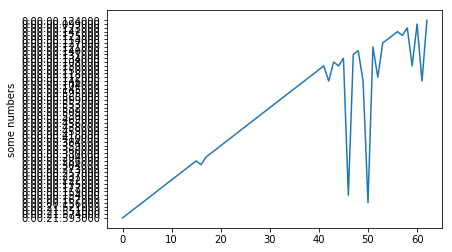

[datetime.timedelta(0, 21, 593000), datetime.timedelta(0, 21, 574000), datetime.timedelta(0, 21, 551000), datetime.timedelta(0, 21, 521000), datetime.timedelta(0, 0, 156000), datetime.timedelta(0, 0, 167000), datetime.timedelta(0, 0, 154000), datetime.timedelta(0, 0, 159000), datetime.timedelta(0, 0, 177000), datetime.timedelta(0, 0, 175000), datetime.timedelta(0, 0, 222000), datetime.timedelta(0, 0, 237000), datetime.timedelta(0, 0, 257000), datetime.timedelta(0, 0, 273000), datetime.timedelta(0, 0, 304000), datetime.timedelta(0, 0, 286000), datetime.timedelta(0, 0, 304000), datetime.timedelta(0, 0, 294000), datetime.timedelta(0, 0, 330000), datetime.timedelta(0, 0, 360000), datetime.timedelta(0, 0, 359000), datetime.timedelta(0, 0, 384000), datetime.timedelta(0, 0, 410000), datetime.timedelta(0, 0, 418000), datetime.timedelta(0, 0, 459000), datetime.timedelta(0, 0, 438000), datetime.timedelta(0, 0, 456000), datetime.timedelta(0, 0, 469000), datetime.timedelta(0, 0, 539000), datetime.

In [51]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
print(propogation_times)

1.2. One Transactions per 10 second

In [6]:
for i in range(7):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(8):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(7):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(10)
    
for i in range(8):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(10)

2019-04-21 20:34:39.120 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:34:49.813 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:00.595 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:11.242 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:21.895 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:32.534 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 20:37:30.249 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:37:40.777 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:37:51.349 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:38:01.969 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:38:12.548 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:38:23.084 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:38:33.635 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:38:44.147 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:38:54.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:39:05.175 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:39:15.688 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:39:26.234 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:39:36.744 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:39:47.284 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

In [7]:
# Get Docker logs
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_5s/%s.log'%(pwd[0],container))


[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

In [8]:
docker_cleanup()

0dbabb72db2e
eace4068f862
c10d5c34f5d6
ab3bb5c6aeaf
111cfee211e3
4b6c418539e9
919cba17da5d
305ce06a8afd
a8630a5cdfba
8203a409b2ee
7819d7acf94f
96bbbe71e3f9
13b13884b2f3
e911ebb2bdae
a6222cfd2b5b
d7726f7d8952
95650d80d835
116aedbdced9
Deleted Volumes:
experiment1_peer1.hospital.organ.com
experiment1_peer1.histocompatibility.organ.com
experiment1_peer0.opo.organ.com
experiment1_peer1.opo.organ.com
experiment1_peer0.gp.organ.com
524d0a000589da4efce67be210be9b8cd13166369af977d974a8c210b1e92e24
experiment1_orderer.organ.com
experiment1_peer0.hospital.organ.com
experiment1_peer0.histocompatibility.organ.com
experiment1_peer1.gp.organ.com

Total reclaimed space: 16.34MB
Deleted Networks:
experiment1_organ_chain_network

docker rmi -f dev-peer1.opo.organ.com-organcc-1.0-f7ab76561c21a418dff95bfcdf78a45d8518b5f2d2be784ba3c86fb909c544e7 dev-peer0.opo.organ.com-organcc-1.0-3c2835bd5a5e83879fa36d0ce15cceb12743fd1bbdab349bc7725cdd819233c1 dev-peer0.gp.organ.com-organcc-1.0-98700bef371b6133ea4b2c0083

In [11]:
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])


In [12]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

All containers with their log files are 
peer0.gp.organ.com:<type 'list'>
peer1.gp.organ.com:<type 'list'>
peer0.histocompatibility.organ.com:<type 'list'>
peer1.histocompatibility.organ.com:<type 'list'>
peer0.opo.organ.com:<type 'list'>
peer1.opo.organ.com:<type 'list'>
peer0.hospital.organ.com:<type 'list'>
peer1.hospital.organ.com:<type 'list'>
Recevied Line 35
1 block was received at 2019-04-21 20:31:50.274000+00:00 by peer peer0.gp.organ.com
2 block was received at 2019-04-21 20:31:50.419000+00:00 by peer peer0.gp.organ.com
3 block was received at 2019-04-21 20:31:50.518000+00:00 by peer peer0.gp.organ.com
4 block was received at 2019-04-21 20:31:50.594000+00:00 by peer peer0.gp.organ.com
5 block was received at 2019-04-21 20:32:10.754000+00:00 by peer peer0.gp.organ.com
6 block was received at 2019-04-21 20:34:41.128000+00:00 by peer peer0.gp.organ.com
7 block was received at 2019-04-21 20:34:51.822000+00:00 by peer peer0.gp.organ.com
8 block was received at 2019-04-21 20:35:02.

21 block was received at 2019-04-21 20:37:21.683000+00:00 by peer peer1.hospital.organ.com
22 block was received at 2019-04-21 20:37:32.264000+00:00 by peer peer1.hospital.organ.com
23 block was received at 2019-04-21 20:37:42.792000+00:00 by peer peer1.hospital.organ.com
24 block was received at 2019-04-21 20:37:53.367000+00:00 by peer peer1.hospital.organ.com
25 block was received at 2019-04-21 20:38:03.990000+00:00 by peer peer1.hospital.organ.com
26 block was received at 2019-04-21 20:38:14.574000+00:00 by peer peer1.hospital.organ.com
27 block was received at 2019-04-21 20:38:25.100000+00:00 by peer peer1.hospital.organ.com
28 block was received at 2019-04-21 20:38:35.652000+00:00 by peer peer1.hospital.organ.com
29 block was received at 2019-04-21 20:38:46.165000+00:00 by peer peer1.hospital.organ.com
30 block was received at 2019-04-21 20:38:56.686000+00:00 by peer peer1.hospital.organ.com
31 block was received at 2019-04-21 20:39:07.188000+00:00 by peer peer1.hospital.organ.com

28 block was Validated at 2019-04-21 20:38:35.656000+00:00 by peer peer1.opo.organ.com
29 block was Validated at 2019-04-21 20:38:46.171000+00:00 by peer peer1.opo.organ.com
30 block was Validated at 2019-04-21 20:38:56.692000+00:00 by peer peer1.opo.organ.com
31 block was Validated at 2019-04-21 20:39:07.195000+00:00 by peer peer1.opo.organ.com
32 block was Validated at 2019-04-21 20:39:17.708000+00:00 by peer peer1.opo.organ.com
33 block was Validated at 2019-04-21 20:39:28.260000+00:00 by peer peer1.opo.organ.com
34 block was Validated at 2019-04-21 20:39:38.773000+00:00 by peer peer1.opo.organ.com
35 block was Validated at 2019-04-21 20:39:49.306000+00:00 by peer peer1.opo.organ.com
Validated Line 35
1 block was Validated at 2019-04-21 20:31:49.135000+00:00 by peer peer0.hospital.organ.com
2 block was Validated at 2019-04-21 20:31:49.212000+00:00 by peer peer0.hospital.organ.com
3 block was Validated at 2019-04-21 20:31:49.338000+00:00 by peer peer0.hospital.organ.com
4 block was V

18 block was Committed at 2019-04-21 20:36:49.937000+00:00 by peer peer1.histocompatibility.organ.com
19 block was Committed at 2019-04-21 20:37:00.796000+00:00 by peer peer1.histocompatibility.organ.com
20 block was Committed at 2019-04-21 20:37:11.491000+00:00 by peer peer1.histocompatibility.organ.com
21 block was Committed at 2019-04-21 20:37:21.802000+00:00 by peer peer1.histocompatibility.organ.com
22 block was Committed at 2019-04-21 20:37:32.406000+00:00 by peer peer1.histocompatibility.organ.com
23 block was Committed at 2019-04-21 20:37:42.902000+00:00 by peer peer1.histocompatibility.organ.com
24 block was Committed at 2019-04-21 20:37:53.489000+00:00 by peer peer1.histocompatibility.organ.com
25 block was Committed at 2019-04-21 20:38:04.098000+00:00 by peer peer1.histocompatibility.organ.com
26 block was Committed at 2019-04-21 20:38:14.710000+00:00 by peer peer1.histocompatibility.organ.com
27 block was Committed at 2019-04-21 20:38:25.214000+00:00 by peer peer1.histocomp

Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.106000+00:00, vt 2019-04-21 20:31:49.135000+00:00 and ct 2019-04-21 20:31:49.184000+00:00
rt 2019-04-21 20:31:49.184000+00:00; vt 2019-04-21 20:31:49.212000+00:00; ct 2019-04-21 20:31:49.287000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.184000+00:00, vt 2019-04-21 20:31:49.212000+00:00 and ct 2019-04-21 20:31:49.287000+00:00
rt 2019-04-21 20:31:49.287000+00:00; vt 2019-04-21 20:31:49.338000+00:00; ct 2019-04-21 20:31:49.404000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.287000+00:00, vt 2019-04-21 20:31:49.338000+00:00 and ct 2019-04-21 20:31:49.404000+00:00
rt 2019-04-21 20:31:49.405000+00:00; vt 2019-04-21 20:31:49.451000+00:00; ct 2019-04-21 20:31:49.515000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.405000+00:00, vt 2019-04-21 20:31:49.451000+00:00 and ct 2019-04-21 20:31:49.515000+00:00
rt 2019-04-21 20:32:10.756000+00:00; vt 2019-04-21 20:32:10.758000+00:

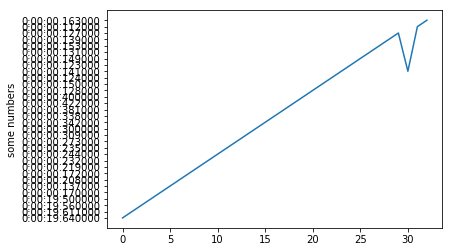

[datetime.timedelta(0, 19, 640000), datetime.timedelta(0, 19, 611000), datetime.timedelta(0, 19, 560000), datetime.timedelta(0, 19, 500000), datetime.timedelta(0, 0, 170000), datetime.timedelta(0, 0, 137000), datetime.timedelta(0, 0, 208000), datetime.timedelta(0, 0, 172000), datetime.timedelta(0, 0, 219000), datetime.timedelta(0, 0, 232000), datetime.timedelta(0, 0, 244000), datetime.timedelta(0, 0, 235000), datetime.timedelta(0, 0, 273000), datetime.timedelta(0, 0, 309000), datetime.timedelta(0, 0, 300000), datetime.timedelta(0, 0, 342000), datetime.timedelta(0, 0, 338000), datetime.timedelta(0, 0, 381000), datetime.timedelta(0, 0, 422000), datetime.timedelta(0, 0, 400000), datetime.timedelta(0, 0, 128000), datetime.timedelta(0, 0, 150000), datetime.timedelta(0, 0, 124000), datetime.timedelta(0, 0, 141000), datetime.timedelta(0, 0, 123000), datetime.timedelta(0, 0, 149000), datetime.timedelta(0, 0, 131000), datetime.timedelta(0, 0, 153000), datetime.timedelta(0, 0, 139000), datetime.

In [14]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
# print(propogation_times)

# Experiment 1.2
With batch time-out of 5s

In [15]:
docker_cleanup()

"docker rm" requires at least 1 argument.
See 'docker rm --help'.

Usage:  docker rm [OPTIONS] CONTAINER [CONTAINER...]

Remove one or more containers
Total reclaimed space: 0B
docker rmi -f 
"docker rmi" requires at least 1 argument.
See 'docker rmi --help'.

Usage:  docker rmi [OPTIONS] IMAGE [IMAGE...]

Remove one or more images


2019-04-21 20:52:32.862 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:38.513 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:44.097 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:49.683 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:55.259 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:53:00.900 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 20:55:30.927 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:55:36.448 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:55:41.973 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:55:47.486 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:55:53.283 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

785582, \\\"consent_don_regis\\\": 84298638, \\\"vdrl_don\\\": \\\"xh\\\", \\\"lis2_initial_flush_ostxt\\\": \\\"trymbgcicoyoqwxjvybxspzmzysqlngvdunrkftsysejgnbfxm\\\", \\\"rt_ki_glomerul_count\\\": 91993510, \\\"diast_pa_cath_init_don\\\": 41088811, \\\"ins2_final_flush\\\": 80650651, \\\"num_lu_tx\\\": 24696236, \\\"hr_disposition\\\": 66475708, \\\"kir_discard_cd\\\": 19602921, \\\"other_inf_conf_don\\\": \\\"c\\\", \\\"don_date\\\": 77690265, \\\"pas2_back_tbl_flush\\\": 53281105, \\\"lv_eject_don\\\": 97959703, \\\"lipase_don (pa donors only)\\\": 76221364, \\\"pas2_final_flush\\\": 67742801, \\\"lis1_discard_cd\\\": 64972429, \\\"insulin_dep_don\\\": 96140564, \\\"lub_initial_flush_ostxt\\\": \\\"pxzkrpgryeyqnfsqyydfvqrngfaiapgbpdahryzbopytfufxfr\\\", \\\"lis2_disposition\\\": 60317853, \\\"kib_disposition\\\": 67615889, \\\"death_circum_don\\\": 45241583, \\\"hr_reason_cd\\\": 26728121, \\\"hr_discard_cd\\\": 1562302, \\\"kib_initial_flush_ostxt\\\": \\\"lhyejbjeurndgiwmxbjohcmz

2019-04-21 20:56:04.449 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:56:10.065 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:56:15.606 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:56:21.168 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:56:26.694 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:56:32.212 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:56:37.744 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:56:43.265 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:56:48.779 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:56:54.266 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:56:59.892 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:05.533 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:57:11.138 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:16.730 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:22.335 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:27.902 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:57:33.502 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:39.043 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:44.586 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:50.123 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

_initial_flush\\\": 74910400, \\\"da2\\\": 32136169, \\\"ins2_discard_cd_ostxt\\\": \\\"zcudncnzifqkfnpbvmyqoizelgitcqhbwezycscceauioyhzta\\\", \\\"consent_px_writ_doc\\\": \\\"o\\\", \\\"in_back_tbl_flush_ostxt\\\": \\\"navfposrknosqsxqgkdjotwosqshxqnbptuqyktqbrtbpcnspi\\\", \\\"contin_cocaine_don\\\": \\\"g\\\", \\\"age_don\\\": 17052542, \\\"bun_don\\\": 16124096, \\\"pas1_reason_cd\\\": 36117764, \\\"recovery_date_don\\\": 28797134, \\\"consent_don_regis\\\": 16880181, \\\"vdrl_don\\\": \\\"as\\\", \\\"lis2_initial_flush_ostxt\\\": \\\"funajcwqvefikasbrmrsrowqhbambvtemwzkxhxcfhyeyuuhod\\\", \\\"rt_ki_glomerul_count\\\": 33679775, \\\"diast_pa_cath_init_don\\\": 64139705, \\\"ins2_final_flush\\\": 64935333, \\\"num_lu_tx\\\": 14252110, \\\"hr_disposition\\\": 97912110, \\\"kir_discard_cd\\\": 33403354, \\\"other_inf_conf_don\\\": \\\"j\\\", \\\"don_date\\\": 19008927, \\\"pas2_back_tbl_flush\\\": 25424535, \\\"lv_eject_don\\\": 58987171, \\\"lipase_don (pa donors only)\\\": 76881662

2019-04-21 20:58:01.179 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:58:06.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

18 block was received at 2019-04-21 20:53:45.347000+00:00 by peer peer1.histocompatibility.organ.com
19 block was received at 2019-04-21 20:53:51.045000+00:00 by peer peer1.histocompatibility.organ.com
20 block was received at 2019-04-21 20:53:56.712000+00:00 by peer peer1.histocompatibility.organ.com
21 block was received at 2019-04-21 20:54:02.507000+00:00 by peer peer1.histocompatibility.organ.com
22 block was received at 2019-04-21 20:54:08.283000+00:00 by peer peer1.histocompatibility.organ.com
23 block was received at 2019-04-21 20:54:14.059000+00:00 by peer peer1.histocompatibility.organ.com
24 block was received at 2019-04-21 20:54:19.848000+00:00 by peer peer1.histocompatibility.organ.com
25 block was received at 2019-04-21 20:54:25.671000+00:00 by peer peer1.histocompatibility.organ.com
26 block was received at 2019-04-21 20:54:31.521000+00:00 by peer peer1.histocompatibility.organ.com
27 block was received at 2019-04-21 20:54:37.351000+00:00 by peer peer1.histocompatibility.

27 block was received at 2019-04-21 20:54:37.339000+00:00 by peer peer0.hospital.organ.com
28 block was received at 2019-04-21 20:54:43.180000+00:00 by peer peer0.hospital.organ.com
29 block was received at 2019-04-21 20:54:49.038000+00:00 by peer peer0.hospital.organ.com
30 block was received at 2019-04-21 20:54:54.923000+00:00 by peer peer0.hospital.organ.com
31 block was received at 2019-04-21 20:55:00.768000+00:00 by peer peer0.hospital.organ.com
32 block was received at 2019-04-21 20:55:06.619000+00:00 by peer peer0.hospital.organ.com
33 block was received at 2019-04-21 20:55:12.505000+00:00 by peer peer0.hospital.organ.com
34 block was received at 2019-04-21 20:55:18.644000+00:00 by peer peer0.hospital.organ.com
35 block was received at 2019-04-21 20:55:24.666000+00:00 by peer peer0.hospital.organ.com
36 block was received at 2019-04-21 20:55:30.408000+00:00 by peer peer0.hospital.organ.com
37 block was received at 2019-04-21 20:55:35.948000+00:00 by peer peer0.hospital.organ.com

60 block was Validated at 2019-04-21 20:57:44.062000+00:00 by peer peer1.gp.organ.com
61 block was Validated at 2019-04-21 20:57:49.609000+00:00 by peer peer1.gp.organ.com
62 block was Validated at 2019-04-21 20:57:55.141000+00:00 by peer peer1.gp.organ.com
63 block was Validated at 2019-04-21 20:58:00.653000+00:00 by peer peer1.gp.organ.com
64 block was Validated at 2019-04-21 20:58:06.192000+00:00 by peer peer1.gp.organ.com
65 block was Validated at 2019-04-21 20:58:11.686000+00:00 by peer peer1.gp.organ.com
Validated Line 65
1 block was Validated at 2019-04-21 20:49:38.939000+00:00 by peer peer0.histocompatibility.organ.com
2 block was Validated at 2019-04-21 20:49:39.032000+00:00 by peer peer0.histocompatibility.organ.com
3 block was Validated at 2019-04-21 20:49:39.126000+00:00 by peer peer0.histocompatibility.organ.com
4 block was Validated at 2019-04-21 20:49:39.210000+00:00 by peer peer0.histocompatibility.organ.com
5 block was Validated at 2019-04-21 20:50:07.024000+00:00 by p

7 block was Validated at 2019-04-21 20:52:43.544000+00:00 by peer peer1.opo.organ.com
8 block was Validated at 2019-04-21 20:52:49.119000+00:00 by peer peer1.opo.organ.com
9 block was Validated at 2019-04-21 20:52:54.700000+00:00 by peer peer1.opo.organ.com
10 block was Validated at 2019-04-21 20:53:00.294000+00:00 by peer peer1.opo.organ.com
11 block was Validated at 2019-04-21 20:53:05.928000+00:00 by peer peer1.opo.organ.com
12 block was Validated at 2019-04-21 20:53:11.554000+00:00 by peer peer1.opo.organ.com
13 block was Validated at 2019-04-21 20:53:17.200000+00:00 by peer peer1.opo.organ.com
14 block was Validated at 2019-04-21 20:53:22.830000+00:00 by peer peer1.opo.organ.com
15 block was Validated at 2019-04-21 20:53:28.453000+00:00 by peer peer1.opo.organ.com
16 block was Validated at 2019-04-21 20:53:34.098000+00:00 by peer peer1.opo.organ.com
17 block was Validated at 2019-04-21 20:53:39.722000+00:00 by peer peer1.opo.organ.com
18 block was Validated at 2019-04-21 20:53:45.

50 block was Committed at 2019-04-21 20:56:48.417000+00:00 by peer peer0.gp.organ.com
51 block was Committed at 2019-04-21 20:56:53.858000+00:00 by peer peer0.gp.organ.com
52 block was Committed at 2019-04-21 20:56:59.358000+00:00 by peer peer0.gp.organ.com
53 block was Committed at 2019-04-21 20:57:04.960000+00:00 by peer peer0.gp.organ.com
54 block was Committed at 2019-04-21 20:57:10.696000+00:00 by peer peer0.gp.organ.com
55 block was Committed at 2019-04-21 20:57:16.291000+00:00 by peer peer0.gp.organ.com
56 block was Committed at 2019-04-21 20:57:21.861000+00:00 by peer peer0.gp.organ.com
57 block was Committed at 2019-04-21 20:57:27.461000+00:00 by peer peer0.gp.organ.com
58 block was Committed at 2019-04-21 20:57:33.016000+00:00 by peer peer0.gp.organ.com
59 block was Committed at 2019-04-21 20:57:38.596000+00:00 by peer peer0.gp.organ.com
60 block was Committed at 2019-04-21 20:57:44.106000+00:00 by peer peer0.gp.organ.com
61 block was Committed at 2019-04-21 20:57:49.682000+0

4 block was Committed at 2019-04-21 20:49:39.613000+00:00 by peer peer0.opo.organ.com
5 block was Committed at 2019-04-21 20:50:07.166000+00:00 by peer peer0.opo.organ.com
6 block was Committed at 2019-04-21 20:52:37.911000+00:00 by peer peer0.opo.organ.com
7 block was Committed at 2019-04-21 20:52:43.649000+00:00 by peer peer0.opo.organ.com
8 block was Committed at 2019-04-21 20:52:49.278000+00:00 by peer peer0.opo.organ.com
9 block was Committed at 2019-04-21 20:52:54.921000+00:00 by peer peer0.opo.organ.com
10 block was Committed at 2019-04-21 20:53:00.502000+00:00 by peer peer0.opo.organ.com
11 block was Committed at 2019-04-21 20:53:06.074000+00:00 by peer peer0.opo.organ.com
12 block was Committed at 2019-04-21 20:53:11.753000+00:00 by peer peer0.opo.organ.com
13 block was Committed at 2019-04-21 20:53:17.440000+00:00 by peer peer0.opo.organ.com
14 block was Committed at 2019-04-21 20:53:23.045000+00:00 by peer peer0.opo.organ.com
15 block was Committed at 2019-04-21 20:53:28.590

24 block was Committed at 2019-04-21 20:54:20.152000+00:00 by peer peer1.hospital.organ.com
25 block was Committed at 2019-04-21 20:54:26.143000+00:00 by peer peer1.hospital.organ.com
26 block was Committed at 2019-04-21 20:54:31.901000+00:00 by peer peer1.hospital.organ.com
27 block was Committed at 2019-04-21 20:54:37.842000+00:00 by peer peer1.hospital.organ.com
28 block was Committed at 2019-04-21 20:54:43.687000+00:00 by peer peer1.hospital.organ.com
29 block was Committed at 2019-04-21 20:54:49.437000+00:00 by peer peer1.hospital.organ.com
30 block was Committed at 2019-04-21 20:54:55.446000+00:00 by peer peer1.hospital.organ.com
31 block was Committed at 2019-04-21 20:55:01.253000+00:00 by peer peer1.hospital.organ.com
32 block was Committed at 2019-04-21 20:55:07.227000+00:00 by peer peer1.hospital.organ.com
33 block was Committed at 2019-04-21 20:55:13.253000+00:00 by peer peer1.hospital.organ.com
34 block was Committed at 2019-04-21 20:55:19.119000+00:00 by peer peer1.hospita

Propogation Time of 34 is 0:00:00.671000
Propogation Time of 35 is 0:00:00.694000
Propogation Time of 36 is 0:00:00.117000
Propogation Time of 37 is 0:00:00.141000
Propogation Time of 38 is 0:00:00.099000
Propogation Time of 39 is 0:00:00.136000
Propogation Time of 40 is 0:00:00.148000
Propogation Time of 41 is 0:00:00.143000
Propogation Time of 42 is 0:00:00.166000
Propogation Time of 43 is 0:00:00.121000
Propogation Time of 44 is 0:00:00.134000
Propogation Time of 45 is 0:00:00.163000
Propogation Time of 46 is 0:00:00.160000
Propogation Time of 47 is 0:00:00.104000
Propogation Time of 48 is 0:00:00.133000
Propogation Time of 49 is 0:00:00.118000
Propogation Time of 50 is 0:00:00.161000
Propogation Time of 51 is 0:00:00.142000
Propogation Time of 52 is 0:00:00.108000
Propogation Time of 53 is 0:00:00.132000
Propogation Time of 54 is 0:00:00.156000
Propogation Time of 55 is 0:00:00.146000
Propogation Time of 56 is 0:00:00.146000
Propogation Time of 57 is 0:00:00.118000
Propogation Time

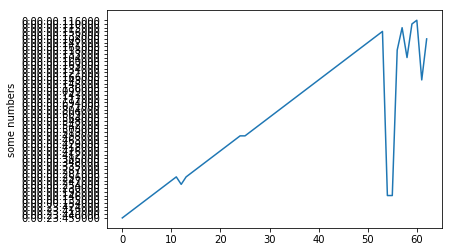

In [16]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_1_2_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_1_2_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_1_2_5s/%s.log'%(pwd[0],container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()

Experiment 2.2 Batch time out of 5 sec and one transaction every 10 sec

2019-04-21 21:04:54.825 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:05.540 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:16.119 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:26.730 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:37.310 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:47.904 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 21:10:25.575 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:10:36.067 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:10:46.615 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:10:57.137 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:11:07.674 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:11:18.186 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:11:28.703 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:11:39.217 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:11:49.749 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:12:00.318 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:12:10.918 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:12:21.605 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:12:32.141 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:12:42.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:12:53.226 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:03.769 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:14.285 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:13:24.828 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:13:35.367 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:45.887 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:56.451 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:14:06.960 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:14:17.489 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:14:28.003 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:14:38.541 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:14:49.056 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:14:59.591 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:15:10.162 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:15:20.708 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

ycaajzdu\\\", \\\"blood_inf_don\\\": \\\"d\\\", \\\"lis1_disposition\\\": 24144200, \\\"kil_initial_flush\\\": 25154232, \\\"kib_reason_ostxt\\\": \\\"yxhavovaqzwixernssenlsmqptdodjpbhhobaucibnyypadpeo\\\", \\\"home_city_don\\\": \\\"siapuorblbhmuokqshox\\\", \\\"med_exam_report\\\": \\\"v\\\", \\\"chagas_history\\\": \\\"t\\\", \\\"kil_final_flush_ostxt\\\": \\\"rpnrdtualmhlpivpmkvyziktyuzyivxkslosrafxorxeozunfu\\\", \\\"ins1_disposition\\\": 69673105, \\\"hbv_sur_antigen_don\\\": \\\"zf\\\", \\\"pas2_initial_flush_ostxt\\\": \\\"yevkquktrbqwlblygottsxbjllswloxsjljlvbsmqsddatxftq\\\", \\\"kir_final_flush_ostxt\\\": \\\"cupnaxvpxwtxdnmvmecmrzsyqhxvkrlnmozmzrvszrqauzullb\\\", \\\"lub_final_flush\\\": 53390383, \\\"num_pa_tx\\\": 3233354, \\\"diast_pa_cath_post_don\\\": 31372654, \\\"med_exam_perm\\\": \\\"q\\\", \\\"hr_initial_flush\\\": 14212443, \\\"amylase_don\\\": 87366834, \\\"num_ki_recov\\\": 88809047, \\\"kil_back_tbl_flush\\\": 90348909, \\\"lur_initial_flush_ostxt\\\": \\\"ixv

Untagged: dev-peer0.histocompatibility.organ.com-organcc-1.0-3c5b27ae0eecc788492cf5c07381f1b7c2819d1dcacff92c5f06e8c045cc6672:latest
Deleted: sha256:abd2501d2a29530183dab75db4f5e36538065e220927001c378210dc81058189
Deleted: sha256:a63cf39f04ab5d50e0da44d8390a20438f7129d0297b2f19a554e177fe09ee51
Deleted: sha256:b5e5cfe41faa2756ba0166e017f1ce2b2394f66648049b7305dab28e5fd926d0
Deleted: sha256:e4c73b1755b25181d2b1d3b76eb4604cc7f5a6578819bd9236439b6c8ce2075b
Untagged: dev-peer1.histocompatibility.organ.com-organcc-1.0-0b5c9cd45a927b038f35508e3863fe8bca8b5206c5ab19556ea651bce6dd7a24:latest
Deleted: sha256:a102bd6b4aab34492869f92a562bc196df336b67aacc4bca4294557fe3eeed18
Deleted: sha256:76de659bec21fd5df5867431f0c5dc2a68dee67800b9bba801a717a9478c91a6
Deleted: sha256:43c1919c6a28e8fadf1c53e8cc618e8eb0f5e638a23b9a809abf5c2aca4872f2
Deleted: sha256:636e73eacb095be52b1589439037ae4d00ccdf62aa2e48d043b851efdfa5001a
Untagged: dev-peer1.gp.organ.com-organcc-1.0-618ffec708d17fefd8ca5ca18551372fee8c0f40d

12 block was received at 2019-04-21 21:06:03.556000+00:00 by peer peer1.histocompatibility.organ.com
13 block was received at 2019-04-21 21:06:14.148000+00:00 by peer peer1.histocompatibility.organ.com
14 block was received at 2019-04-21 21:06:24.790000+00:00 by peer peer1.histocompatibility.organ.com
15 block was received at 2019-04-21 21:06:35.410000+00:00 by peer peer1.histocompatibility.organ.com
16 block was received at 2019-04-21 21:06:46.013000+00:00 by peer peer1.histocompatibility.organ.com
17 block was received at 2019-04-21 21:06:56.630000+00:00 by peer peer1.histocompatibility.organ.com
18 block was received at 2019-04-21 21:07:07.237000+00:00 by peer peer1.histocompatibility.organ.com
19 block was received at 2019-04-21 21:07:17.870000+00:00 by peer peer1.histocompatibility.organ.com
20 block was received at 2019-04-21 21:07:28.540000+00:00 by peer peer1.histocompatibility.organ.com
21 block was received at 2019-04-21 21:07:39.271000+00:00 by peer peer1.histocompatibility.

40 block was received at 2019-04-21 21:11:02.147000+00:00 by peer peer0.hospital.organ.com
41 block was received at 2019-04-21 21:11:12.681000+00:00 by peer peer0.hospital.organ.com
42 block was received at 2019-04-21 21:11:23.192000+00:00 by peer peer0.hospital.organ.com
43 block was received at 2019-04-21 21:11:33.713000+00:00 by peer peer0.hospital.organ.com
44 block was received at 2019-04-21 21:11:44.224000+00:00 by peer peer0.hospital.organ.com
45 block was received at 2019-04-21 21:11:54.755000+00:00 by peer peer0.hospital.organ.com
46 block was received at 2019-04-21 21:12:05.328000+00:00 by peer peer0.hospital.organ.com
47 block was received at 2019-04-21 21:12:15.926000+00:00 by peer peer0.hospital.organ.com
48 block was received at 2019-04-21 21:12:26.615000+00:00 by peer peer0.hospital.organ.com
49 block was received at 2019-04-21 21:12:37.150000+00:00 by peer peer0.hospital.organ.com
50 block was received at 2019-04-21 21:12:47.678000+00:00 by peer peer0.hospital.organ.com

59 block was Validated at 2019-04-21 21:14:22.506000+00:00 by peer peer1.gp.organ.com
60 block was Validated at 2019-04-21 21:14:33.023000+00:00 by peer peer1.gp.organ.com
61 block was Validated at 2019-04-21 21:14:43.561000+00:00 by peer peer1.gp.organ.com
62 block was Validated at 2019-04-21 21:14:54.075000+00:00 by peer peer1.gp.organ.com
63 block was Validated at 2019-04-21 21:15:04.608000+00:00 by peer peer1.gp.organ.com
64 block was Validated at 2019-04-21 21:15:15.176000+00:00 by peer peer1.gp.organ.com
65 block was Validated at 2019-04-21 21:15:25.732000+00:00 by peer peer1.gp.organ.com
Validated Line 65
1 block was Validated at 2019-04-21 21:01:50.864000+00:00 by peer peer0.histocompatibility.organ.com
2 block was Validated at 2019-04-21 21:01:50.956000+00:00 by peer peer0.histocompatibility.organ.com
3 block was Validated at 2019-04-21 21:01:51.021000+00:00 by peer peer0.histocompatibility.organ.com
4 block was Validated at 2019-04-21 21:01:51.106000+00:00 by peer peer0.histo

17 block was Validated at 2019-04-21 21:06:56.643000+00:00 by peer peer1.opo.organ.com
18 block was Validated at 2019-04-21 21:07:07.240000+00:00 by peer peer1.opo.organ.com
19 block was Validated at 2019-04-21 21:07:17.875000+00:00 by peer peer1.opo.organ.com
20 block was Validated at 2019-04-21 21:07:28.542000+00:00 by peer peer1.opo.organ.com
21 block was Validated at 2019-04-21 21:07:39.291000+00:00 by peer peer1.opo.organ.com
22 block was Validated at 2019-04-21 21:07:49.991000+00:00 by peer peer1.opo.organ.com
23 block was Validated at 2019-04-21 21:08:00.791000+00:00 by peer peer1.opo.organ.com
24 block was Validated at 2019-04-21 21:08:11.455000+00:00 by peer peer1.opo.organ.com
25 block was Validated at 2019-04-21 21:08:22.116000+00:00 by peer peer1.opo.organ.com
26 block was Validated at 2019-04-21 21:08:32.826000+00:00 by peer peer1.opo.organ.com
27 block was Validated at 2019-04-21 21:08:43.524000+00:00 by peer peer1.opo.organ.com
28 block was Validated at 2019-04-21 21:08:

34 block was Committed at 2019-04-21 21:09:59.121000+00:00 by peer peer0.gp.organ.com
35 block was Committed at 2019-04-21 21:10:10.032000+00:00 by peer peer0.gp.organ.com
36 block was Committed at 2019-04-21 21:10:20.207000+00:00 by peer peer0.gp.organ.com
37 block was Committed at 2019-04-21 21:10:30.673000+00:00 by peer peer0.gp.organ.com
38 block was Committed at 2019-04-21 21:10:41.173000+00:00 by peer peer0.gp.organ.com
39 block was Committed at 2019-04-21 21:10:51.738000+00:00 by peer peer0.gp.organ.com
40 block was Committed at 2019-04-21 21:11:02.255000+00:00 by peer peer0.gp.organ.com
41 block was Committed at 2019-04-21 21:11:12.788000+00:00 by peer peer0.gp.organ.com
42 block was Committed at 2019-04-21 21:11:23.277000+00:00 by peer peer0.gp.organ.com
43 block was Committed at 2019-04-21 21:11:33.856000+00:00 by peer peer0.gp.organ.com
44 block was Committed at 2019-04-21 21:11:44.367000+00:00 by peer peer0.gp.organ.com
45 block was Committed at 2019-04-21 21:11:54.854000+0

45 block was Committed at 2019-04-21 21:11:54.881000+00:00 by peer peer1.histocompatibility.organ.com
46 block was Committed at 2019-04-21 21:12:05.435000+00:00 by peer peer1.histocompatibility.organ.com
47 block was Committed at 2019-04-21 21:12:16.042000+00:00 by peer peer1.histocompatibility.organ.com
48 block was Committed at 2019-04-21 21:12:26.757000+00:00 by peer peer1.histocompatibility.organ.com
49 block was Committed at 2019-04-21 21:12:37.279000+00:00 by peer peer1.histocompatibility.organ.com
50 block was Committed at 2019-04-21 21:12:47.785000+00:00 by peer peer1.histocompatibility.organ.com
51 block was Committed at 2019-04-21 21:12:58.367000+00:00 by peer peer1.histocompatibility.organ.com
52 block was Committed at 2019-04-21 21:13:08.889000+00:00 by peer peer1.histocompatibility.organ.com
53 block was Committed at 2019-04-21 21:13:19.401000+00:00 by peer peer1.histocompatibility.organ.com
54 block was Committed at 2019-04-21 21:13:29.998000+00:00 by peer peer1.histocomp

65 block was Committed at 2019-04-21 21:15:25.871000+00:00 by peer peer0.hospital.organ.com
Committed Line 66
0 block was Committed at 2019-04-21 21:01:44.583000+00:00 by peer peer1.hospital.organ.com
1 block was Committed at 2019-04-21 21:01:50.498000+00:00 by peer peer1.hospital.organ.com
2 block was Committed at 2019-04-21 21:01:50.576000+00:00 by peer peer1.hospital.organ.com
3 block was Committed at 2019-04-21 21:01:50.647000+00:00 by peer peer1.hospital.organ.com
4 block was Committed at 2019-04-21 21:01:50.740000+00:00 by peer peer1.hospital.organ.com
5 block was Committed at 2019-04-21 21:02:12.960000+00:00 by peer peer1.hospital.organ.com
6 block was Committed at 2019-04-21 21:05:00.082000+00:00 by peer peer1.hospital.organ.com
7 block was Committed at 2019-04-21 21:05:10.671000+00:00 by peer peer1.hospital.organ.com
8 block was Committed at 2019-04-21 21:05:21.300000+00:00 by peer peer1.hospital.organ.com
9 block was Committed at 2019-04-21 21:05:31.933000+00:00 by peer peer1

Adding peer1.gp.organ.com with rt 2019-04-21 21:02:07.931000+00:00, vt 2019-04-21 21:02:07.952000+00:00 and ct 2019-04-21 21:02:07.986000+00:00
rt 2019-04-21 21:02:12.839000+00:00; vt 2019-04-21 21:02:12.843000+00:00; ct 2019-04-21 21:02:12.977000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:02:12.839000+00:00, vt 2019-04-21 21:02:12.843000+00:00 and ct 2019-04-21 21:02:12.977000+00:00
rt 2019-04-21 21:04:59.846000+00:00; vt 2019-04-21 21:04:59.848000+00:00; ct 2019-04-21 21:05:00.083000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:04:59.846000+00:00, vt 2019-04-21 21:04:59.848000+00:00 and ct 2019-04-21 21:05:00.083000+00:00
rt 2019-04-21 21:05:10.558000+00:00; vt 2019-04-21 21:05:10.564000+00:00; ct 2019-04-21 21:05:10.702000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:05:10.558000+00:00, vt 2019-04-21 21:05:10.564000+00:00 and ct 2019-04-21 21:05:10.702000+00:00
rt 2019-04-21 21:05:21.161000+00:00; vt 2019-04-21 21:05:21.164000+00:00; ct 2019-04-21 21:05:

rt 2019-04-21 21:10:41.082000+00:00; vt 2019-04-21 21:10:41.084000+00:00; ct 2019-04-21 21:10:41.182000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:10:41.082000+00:00, vt 2019-04-21 21:10:41.084000+00:00 and ct 2019-04-21 21:10:41.182000+00:00
rt 2019-04-21 21:10:51.634000+00:00; vt 2019-04-21 21:10:51.637000+00:00; ct 2019-04-21 21:10:51.738000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:10:51.634000+00:00, vt 2019-04-21 21:10:51.637000+00:00 and ct 2019-04-21 21:10:51.738000+00:00
rt 2019-04-21 21:11:02.155000+00:00; vt 2019-04-21 21:11:02.160000+00:00; ct 2019-04-21 21:11:02.257000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:11:02.155000+00:00, vt 2019-04-21 21:11:02.160000+00:00 and ct 2019-04-21 21:11:02.257000+00:00
rt 2019-04-21 21:11:12.693000+00:00; vt 2019-04-21 21:11:12.695000+00:00; ct 2019-04-21 21:11:12.806000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:11:12.693000+00:00, vt 2019-04-21 21:11:12.695000+00:00 and ct 2019-04-21 21:11:

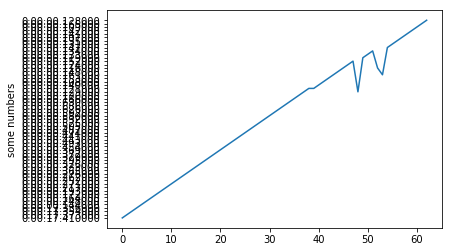

In [18]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(10)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_2_2_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_2_2_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2_2_5s/%s.log'%(pwd[0],container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()